# MSIN0144 Dissertation

## Potential Customer Prediction in Term Deposit Subscription using Machine Learning Models: A Study on Bank Telemarketing Campaign

In [1]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.feature_selection import chi2
from scipy.stats import kruskal

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN 
from collections import Counter

from sklearn.model_selection import RepeatedStratifiedKFold 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator
from sklearn.ensemble import VotingClassifier

from sklearn.inspection import permutation_importance

In [2]:
original_df=pd.read_csv('bank full.csv')

# Data Visualisation 

In [3]:
original_df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no  

[45211 rows x 17 columns]

In [4]:
# describe
original_df[['balance','age','duration','campaign','pdays','previous']].describe().round(1)

balance      age  duration  campaign    pdays  previous
count   45211.0  45211.0   45211.0   45211.0  45211.0   45211.0
mean     1362.3     40.9     258.2       2.8     40.2       0.6
std      3044.8     10.6     257.5       3.1    100.1       2.3
min     -8019.0     18.0       0.0       1.0     -1.0       0.0
25%        72.0     33.0     103.0       1.0     -1.0       0.0
50%       448.0     39.0     180.0       2.0     -1.0       0.0
75%      1428.0     48.0     319.0       3.0     -1.0       0.0
max    102127.0     95.0    4918.0      63.0    871.0     275.0

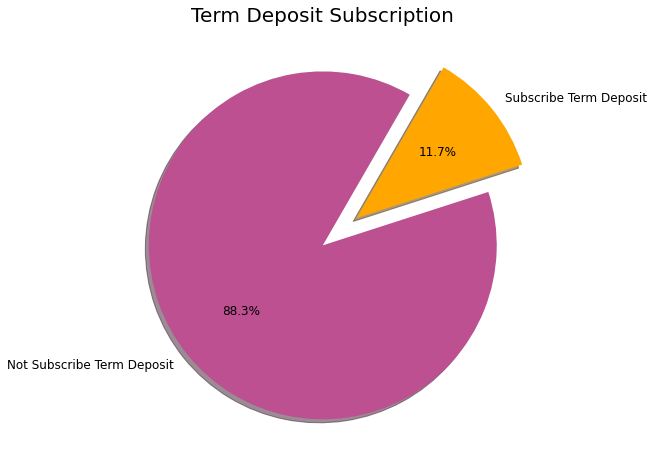

In [9]:
#1. Deposit Option
labels = "Not Subscribe Term Deposit","Subscribe Term Deposit",

plt.title('Term Deposit Subscription', fontsize=20)

original_df["deposit"].value_counts().plot.pie(explode=[0,0.25], shadow=True,colors=['#bc5090','#ffa600'],autopct='%.1f%%',
                                                                                     labels=labels,fontsize=12,figsize=(8,8),startangle=60);

plt.ylabel('');

## Continous Variables

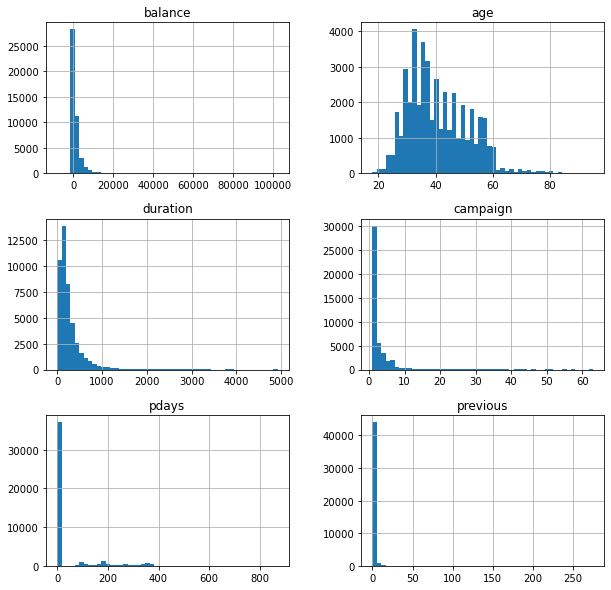

In [12]:
original_df.hist(column=['balance','age','duration','campaign','pdays','previous'
                ],figsize=(10,10),bins=50);

In [44]:
import statistics
statistics.mode(age_deposit_no)

32

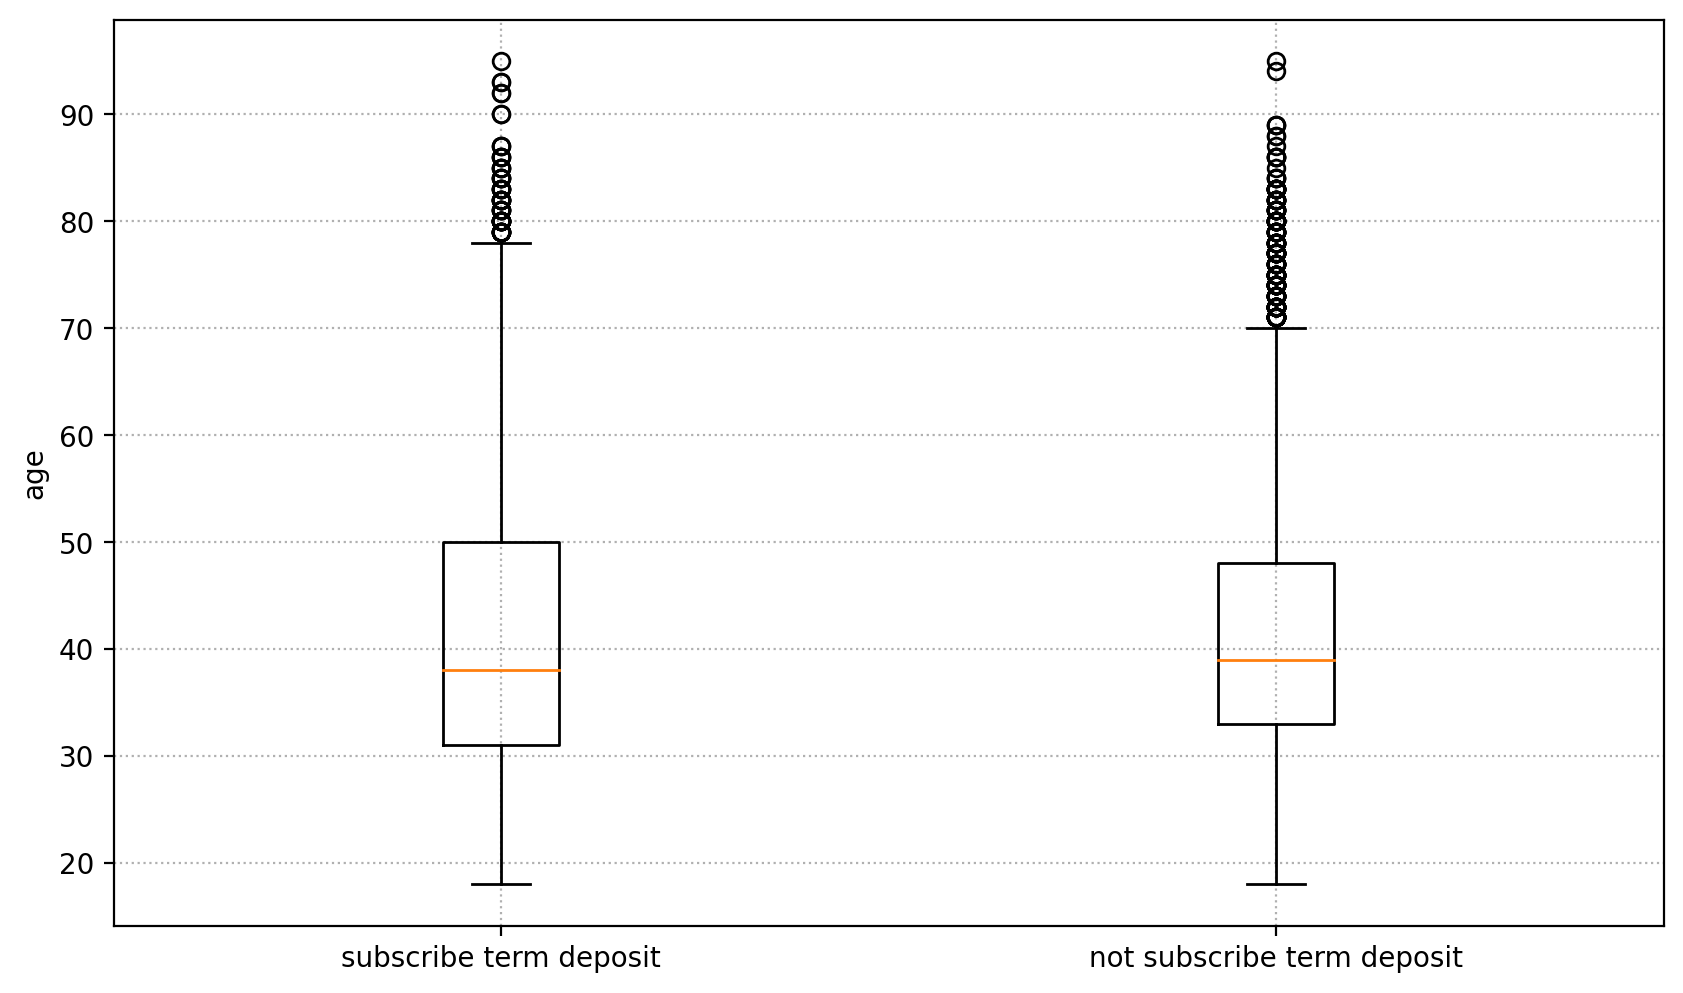

In [33]:
# age (boxplot)
age_deposit_yes=original_df[original_df['deposit']=='yes']['age']
age_deposit_no=original_df[original_df['deposit']=='no']['age']
labels = ['subscribe term deposit', 'not subscribe term deposit']
plt.figure(figsize=(10,6),dpi=200)
plt.ylabel('age')
plt.grid(linestyle=':')
plt.boxplot([age_deposit_yes, age_deposit_no], labels=labels);

<AxesSubplot:xlabel='deposit', ylabel='duration'>

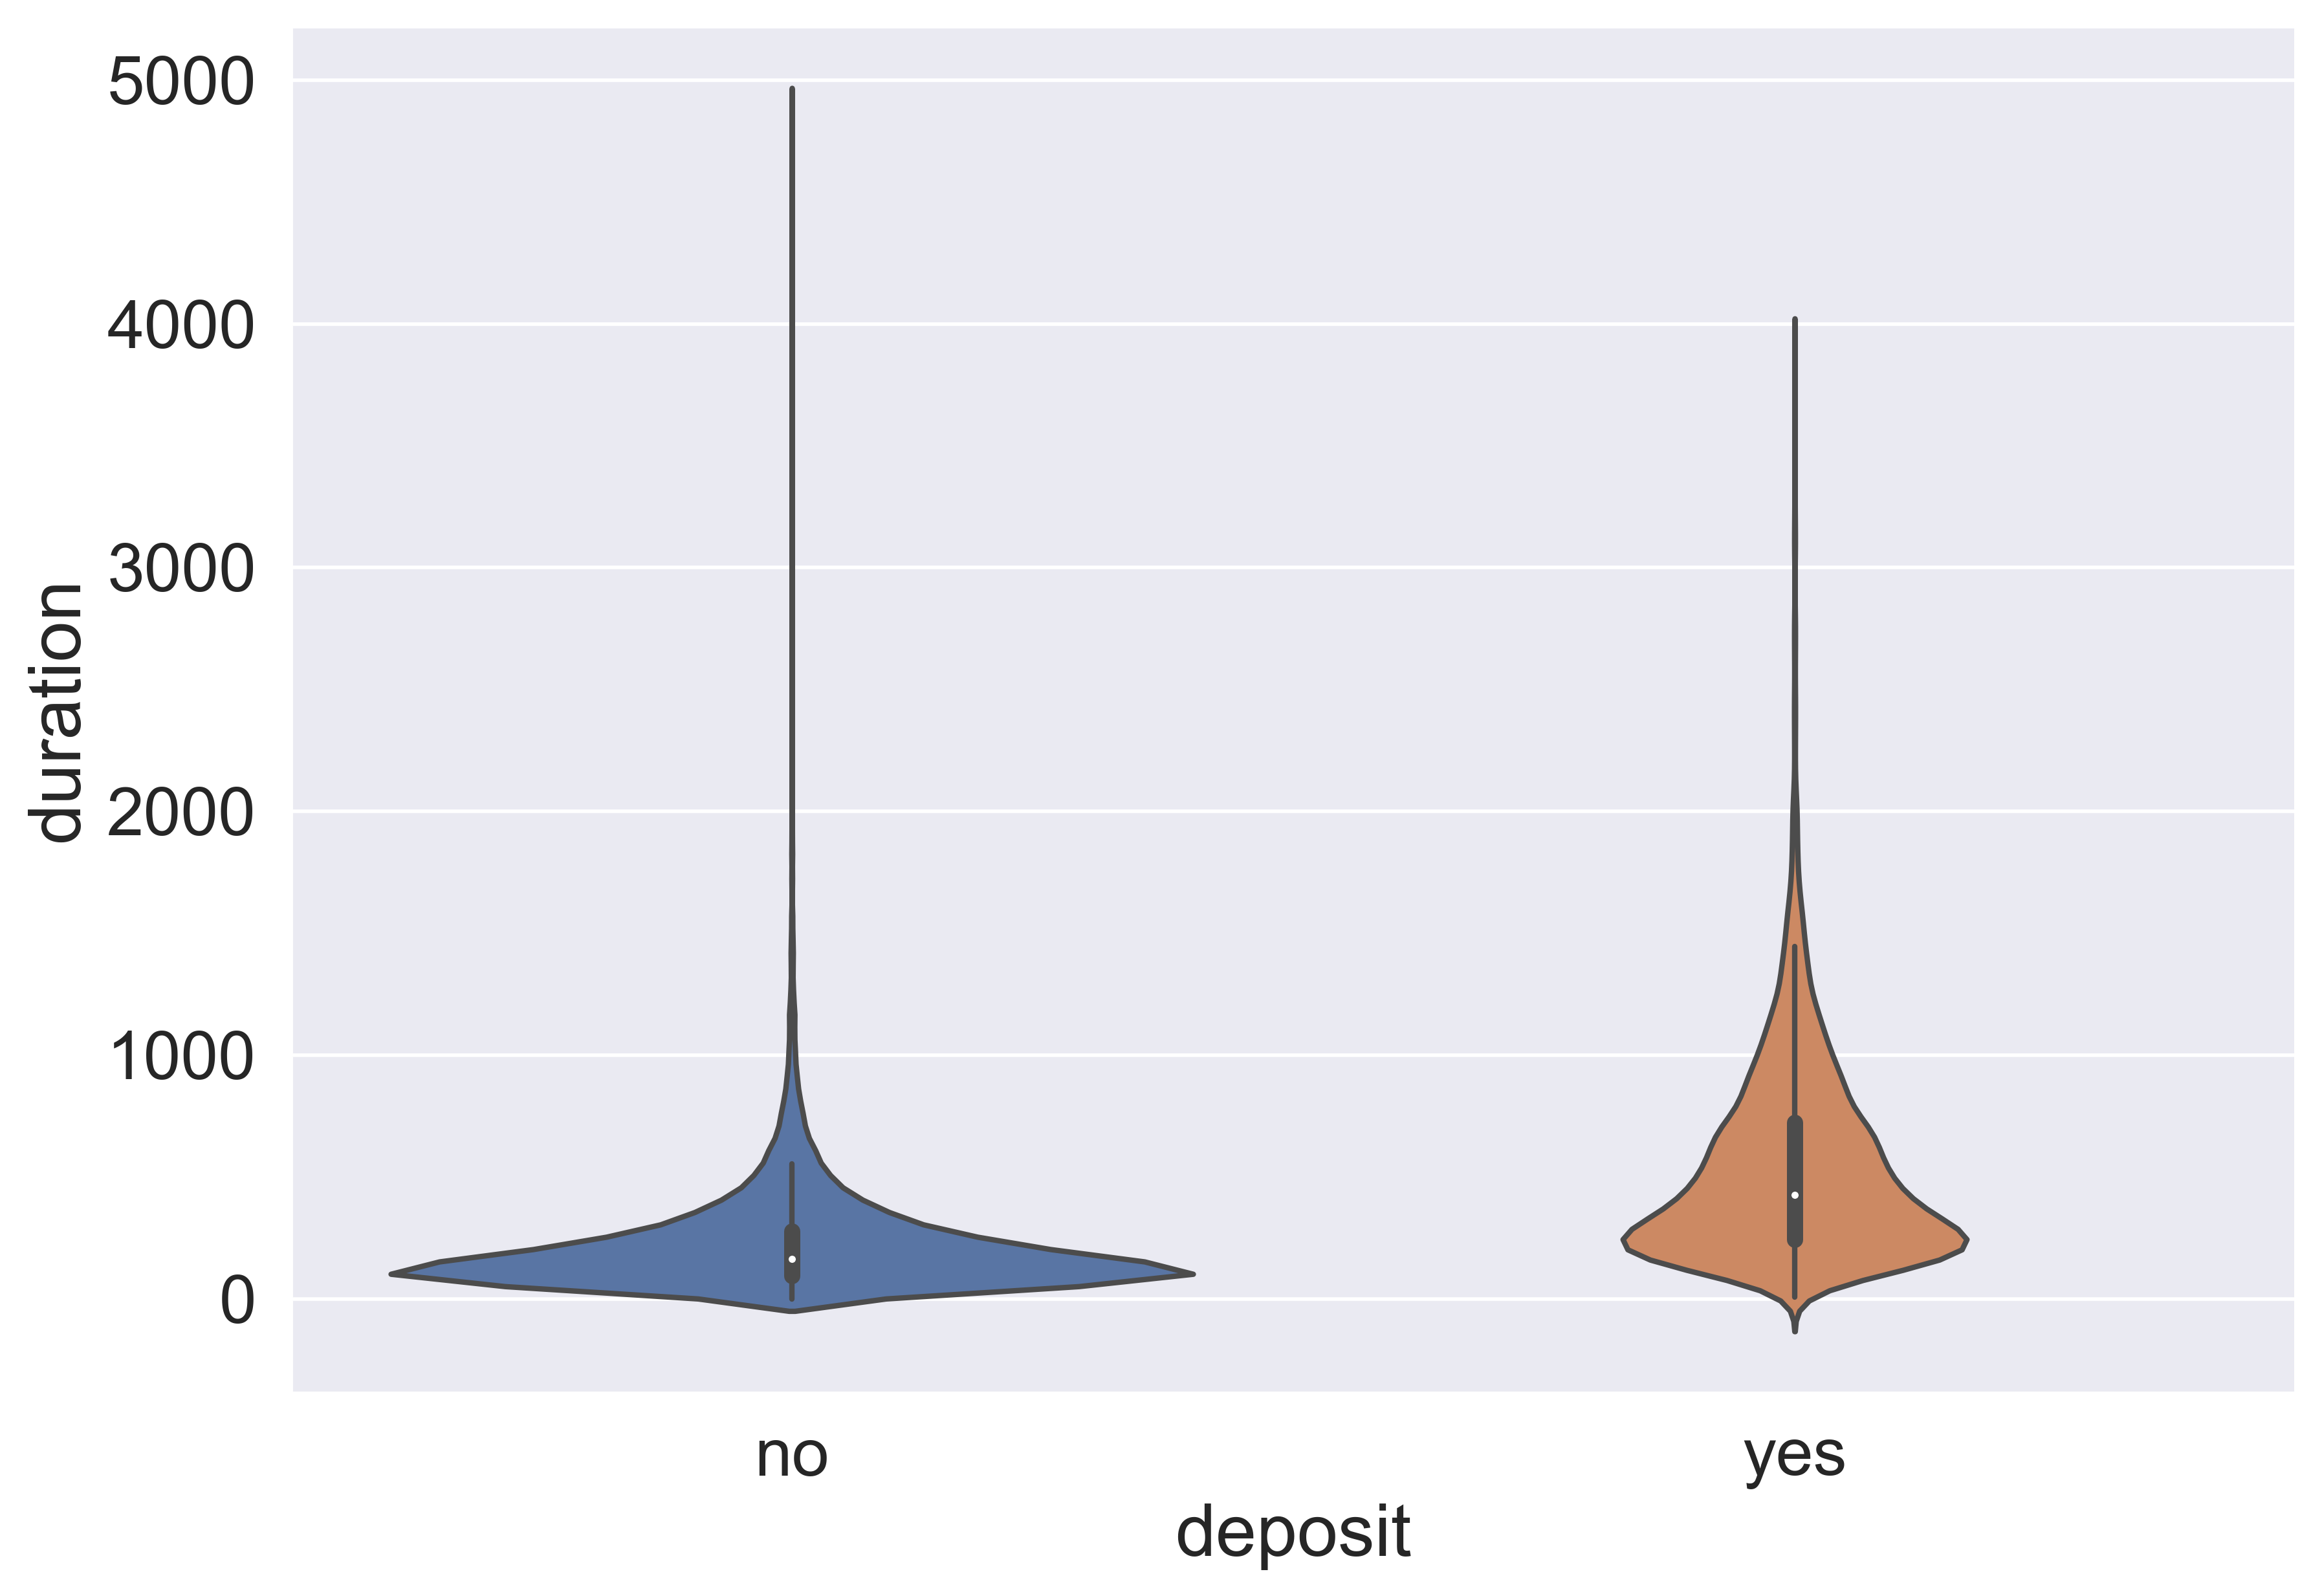

In [19]:
#duration violin plot
sns.set(rc={'figure.figsize':(10,7),'figure.dpi':400});
sns.set(font_scale = 1.7);
sns.violinplot(x=original_df['deposit'], y=original_df['duration'])

## Categorical Variables

['default','housing','loan','job','marital','contact','month','poutcome','education']

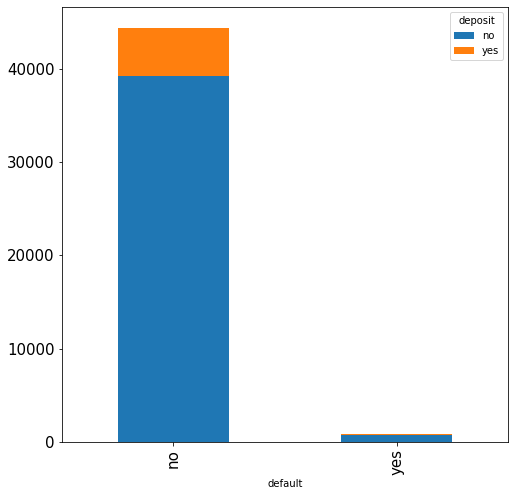

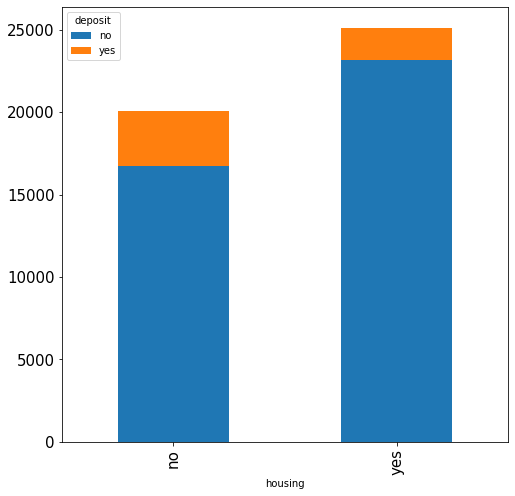

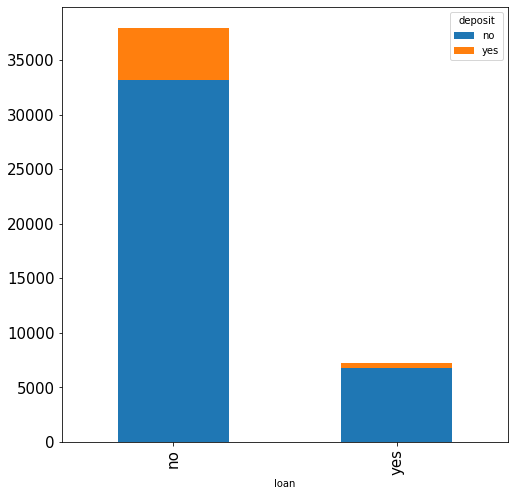

In [13]:
# binary variables
default_plot = original_df.groupby(['deposit', 'default']).size().reset_index().pivot(columns='deposit', index='default', values=0)
default_plot.plot(kind="bar", stacked=True,fontsize=15,figsize=(8,8));

housing_plot = original_df.groupby(['deposit', 'housing']).size().reset_index().pivot(columns='deposit', index='housing', values=0)
housing_plot.plot(kind="bar", stacked=True,fontsize=15,figsize=(8,8));

loan_plot = original_df.groupby(['deposit', 'loan']).size().reset_index().pivot(columns='deposit', index='loan', values=0)
loan_plot.plot(kind="bar", stacked=True,fontsize=15,figsize=(8,8));

In [78]:
job['sum']=job['no']+job['yes']
job['pct_subscribe']=job['yes']/job['sum']
job=job.sort_values(by='yes')
job

deposit            job    no   yes   sum  pct_subscribe
11             unknown   254    34   288       0.118056
3            housemaid  1131   109  1240       0.087903
2         entrepreneur  1364   123  1487       0.082717
6        self-employed  1392   187  1579       0.118429
10          unemployed  1101   202  1303       0.155027
8              student   669   269   938       0.286780
7             services  3785   369  4154       0.088830
5              retired  1748   516  2264       0.227915
0               admin.  4540   631  5171       0.122027
1          blue-collar  9024   708  9732       0.072750
9           technician  6757   840  7597       0.110570
4           management  8157  1301  9458       0.137556

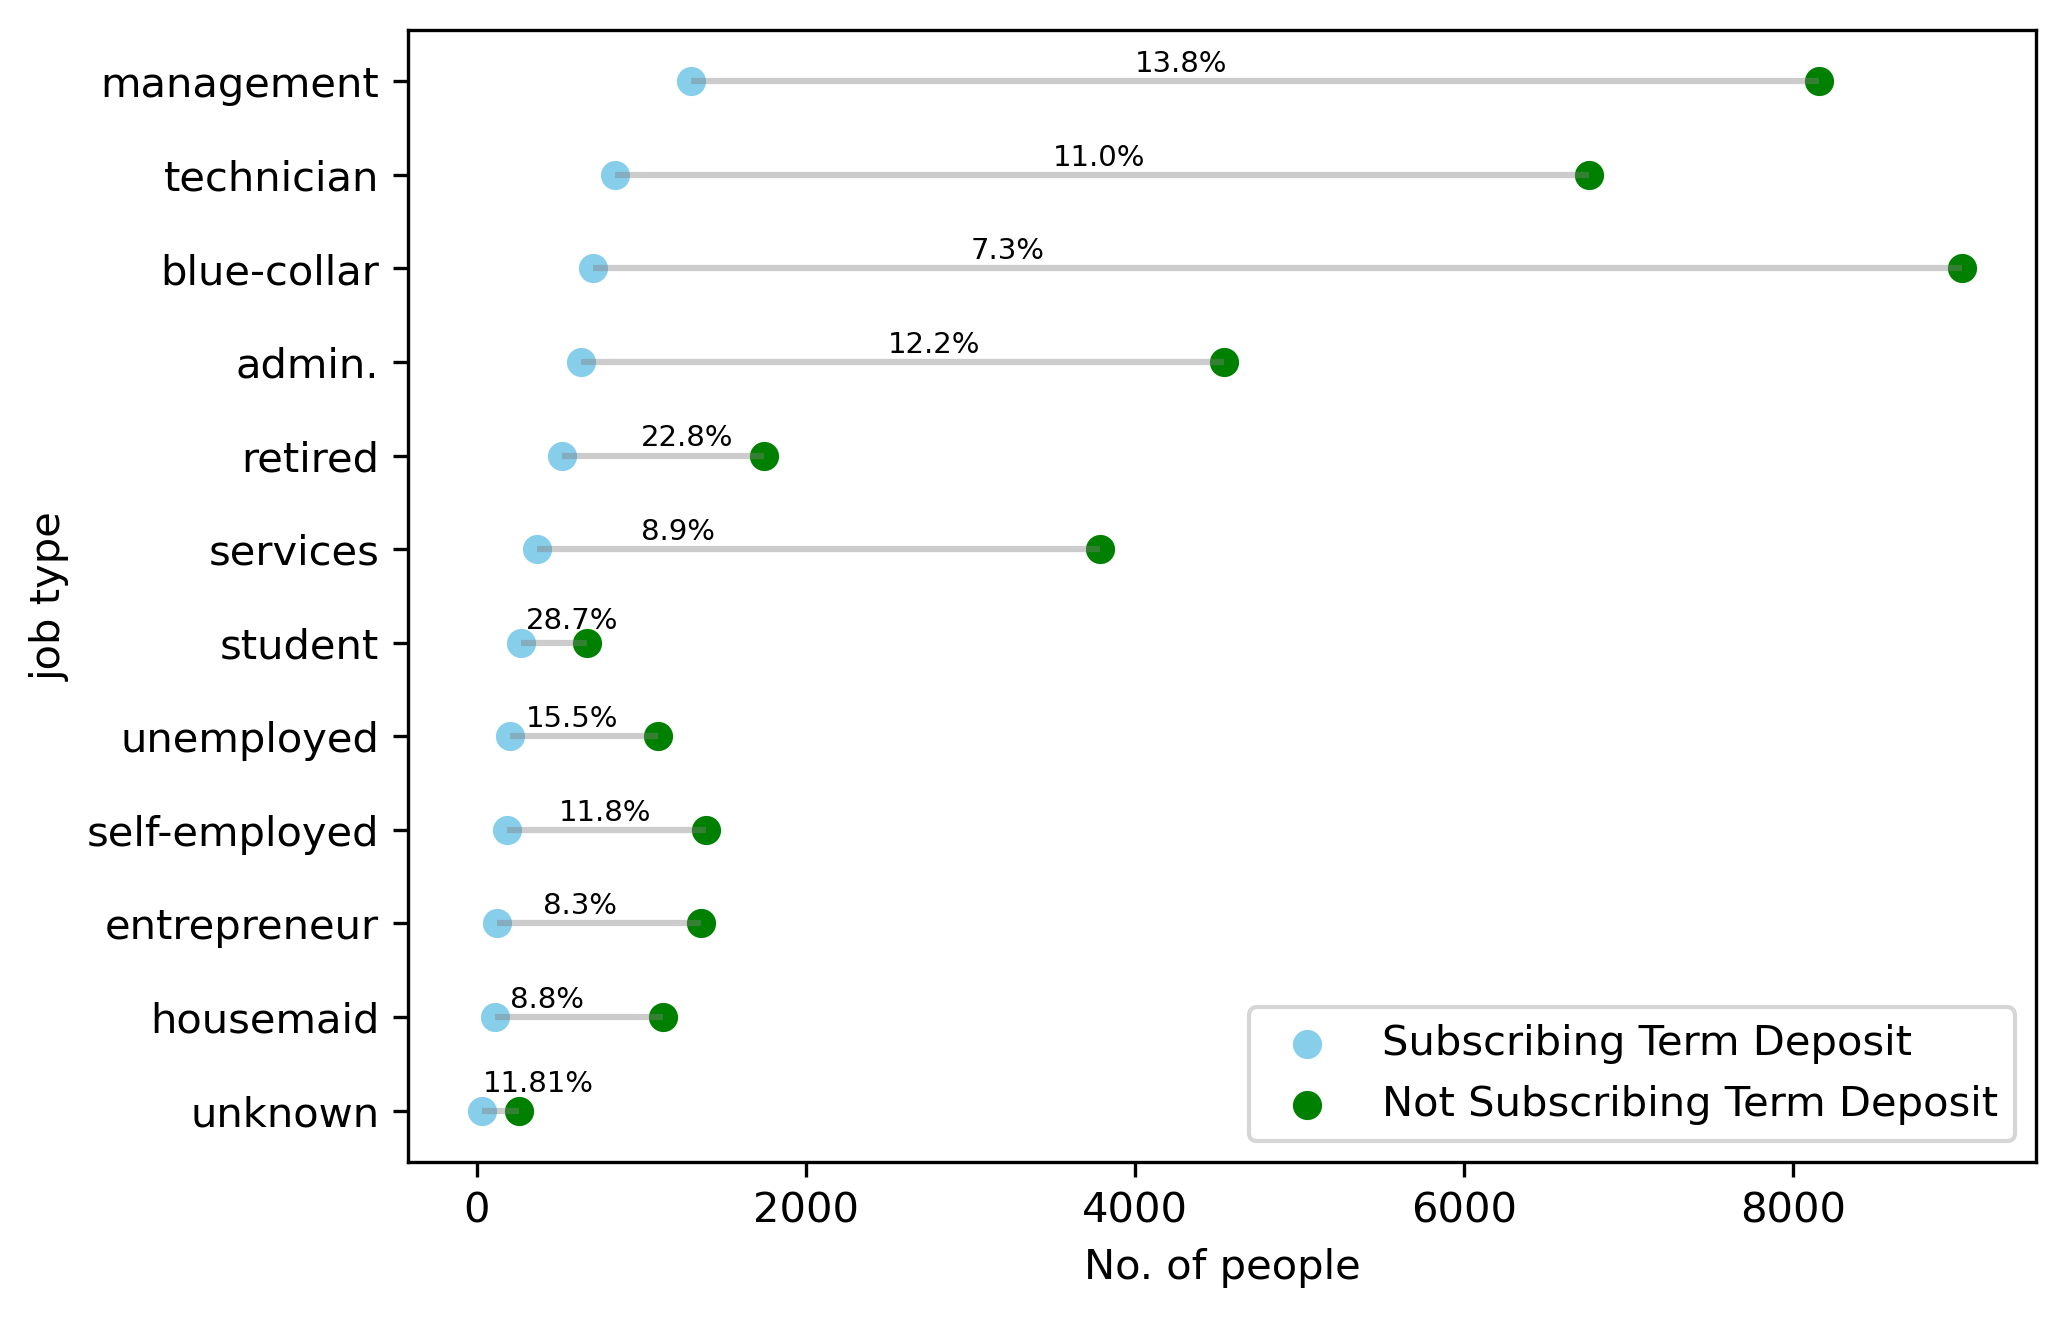

In [130]:
# job
job=pd.crosstab(original_df['job'],original_df['deposit'])
job.reset_index(inplace=True)
job=job[['job','no','yes']]

job['sum']=job['no']+job['yes']
job['pct_subscribe']=job['yes']/job['sum']
job=job.sort_values(by='yes')
my_range=range(1,len(job.index)+1)

plt.figure(figsize=(7,5),dpi=300)
plt.hlines(y=my_range, xmin=job['yes'], xmax=job['no'], color='grey', alpha=0.4)
plt.scatter(job['yes'], my_range, color='skyblue', label='Subscribing Term Deposit')
plt.scatter(job['no'], my_range, color='green' , label='Not Subscribing Term Deposit')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, job['job'])
plt.xlabel('No. of people')
plt.ylabel('job type')


plt.text(40,1.2,'11.81%',fontsize=7) # unknown
plt.text(200,2.1,'8.8%',fontsize=7) # housemaid
plt.text(400,3.1,'8.3%',fontsize=7) # entrepreneur
plt.text(500,4.1,'11.8%',fontsize=7) # self-employed
plt.text(300,5.1,'15.5%',fontsize=7) # unemployed
plt.text(300,6.15,'28.7%',fontsize=7) # student
plt.text(1000,7.1,'8.9%',fontsize=7) # services
plt.text(1000,8.1,'22.8%',fontsize=7) # retired
plt.text(2500,9.1,'12.2%',fontsize=7) # admin
plt.text(3000,10.1,'7.3%',fontsize=7) # blue-collar
plt.text(3500,11.1,'11.0%',fontsize=7) # tehcnician
plt.text(4000,12.1,'13.8%',fontsize=7) # management


# Show the graph
plt.show();

In [88]:
marital

deposit   marital     no   yes    sum  pct_subscribe
0        divorced   4585   622   5207       0.119455
2          single  10878  1912  12790       0.149492
1         married  24459  2755  27214       0.101235

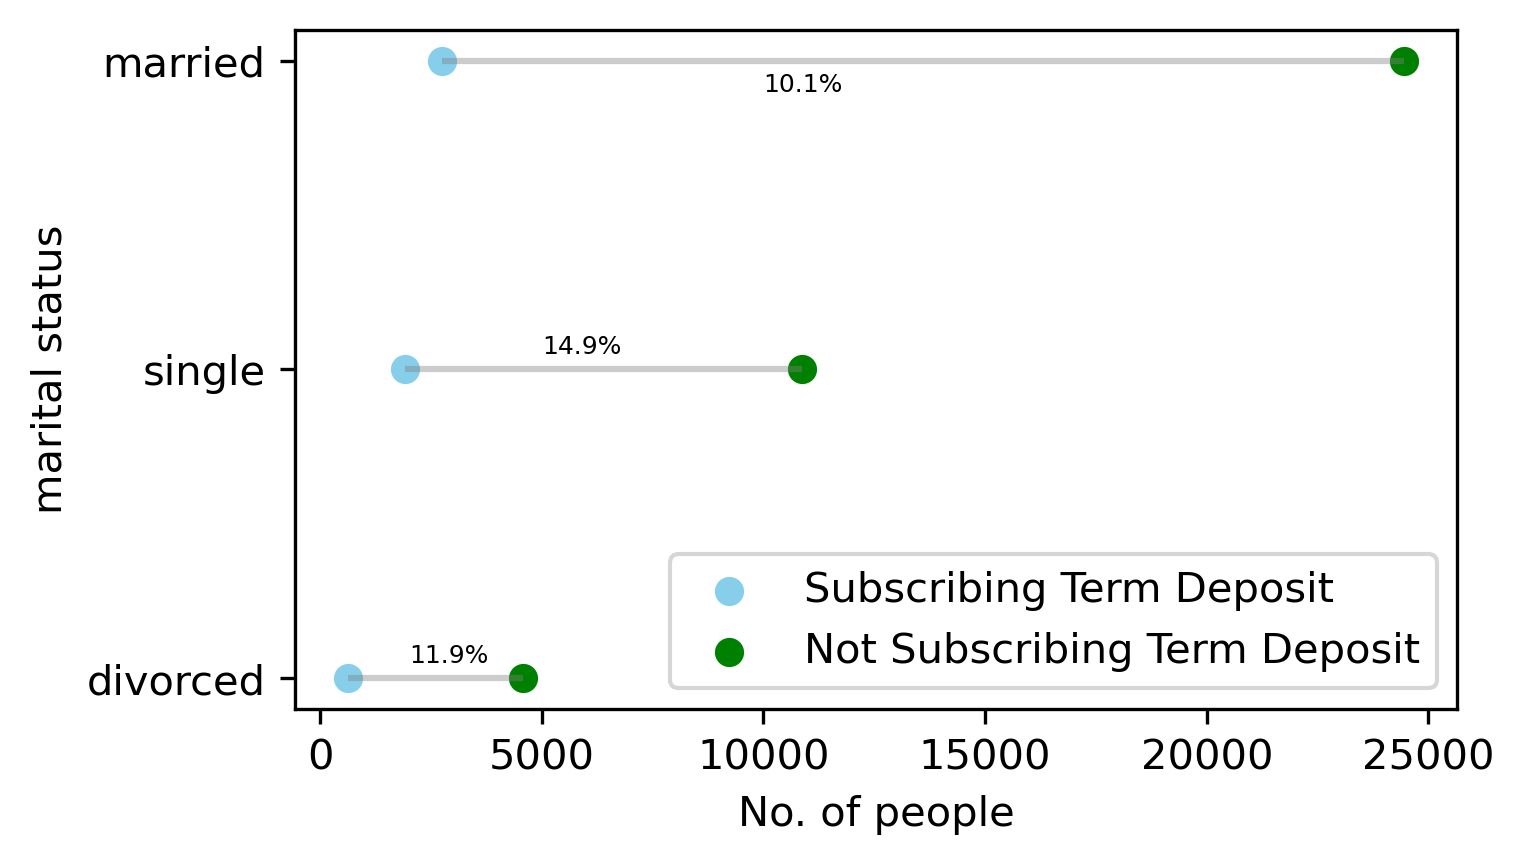

In [126]:
# marital
marital=pd.crosstab(original_df['marital'],original_df['deposit'])
marital.reset_index(inplace=True)
marital=marital[['marital','no','yes']]
marital=marital.sort_values(by='no')
my_range=range(1,len(marital.index)+1)
marital['sum']=marital['no']+marital['yes']
marital['pct_subscribe']=marital['yes']/marital['sum']

plt.figure(figsize=(5,3),dpi=300)
plt.hlines(y=my_range, xmin=marital['yes'], xmax=marital['no'], color='grey', alpha=0.4)
plt.scatter(marital['yes'], my_range, color='skyblue', label='Subscribing Term Deposit')
plt.scatter(marital['no'], my_range, color='green' , label='Not Subscribing Term Deposit')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, marital['marital'])
plt.xlabel('No. of people')
plt.ylabel('marital status')

plt.text(2000.5,1.05,'11.9%',fontsize=6) # de
plt.text(5000,2.05,'14.9%',fontsize=6) # sin
plt.text(10000,2.9,'10.1%',fontsize=6) # mar

# Show the graph
plt.show();

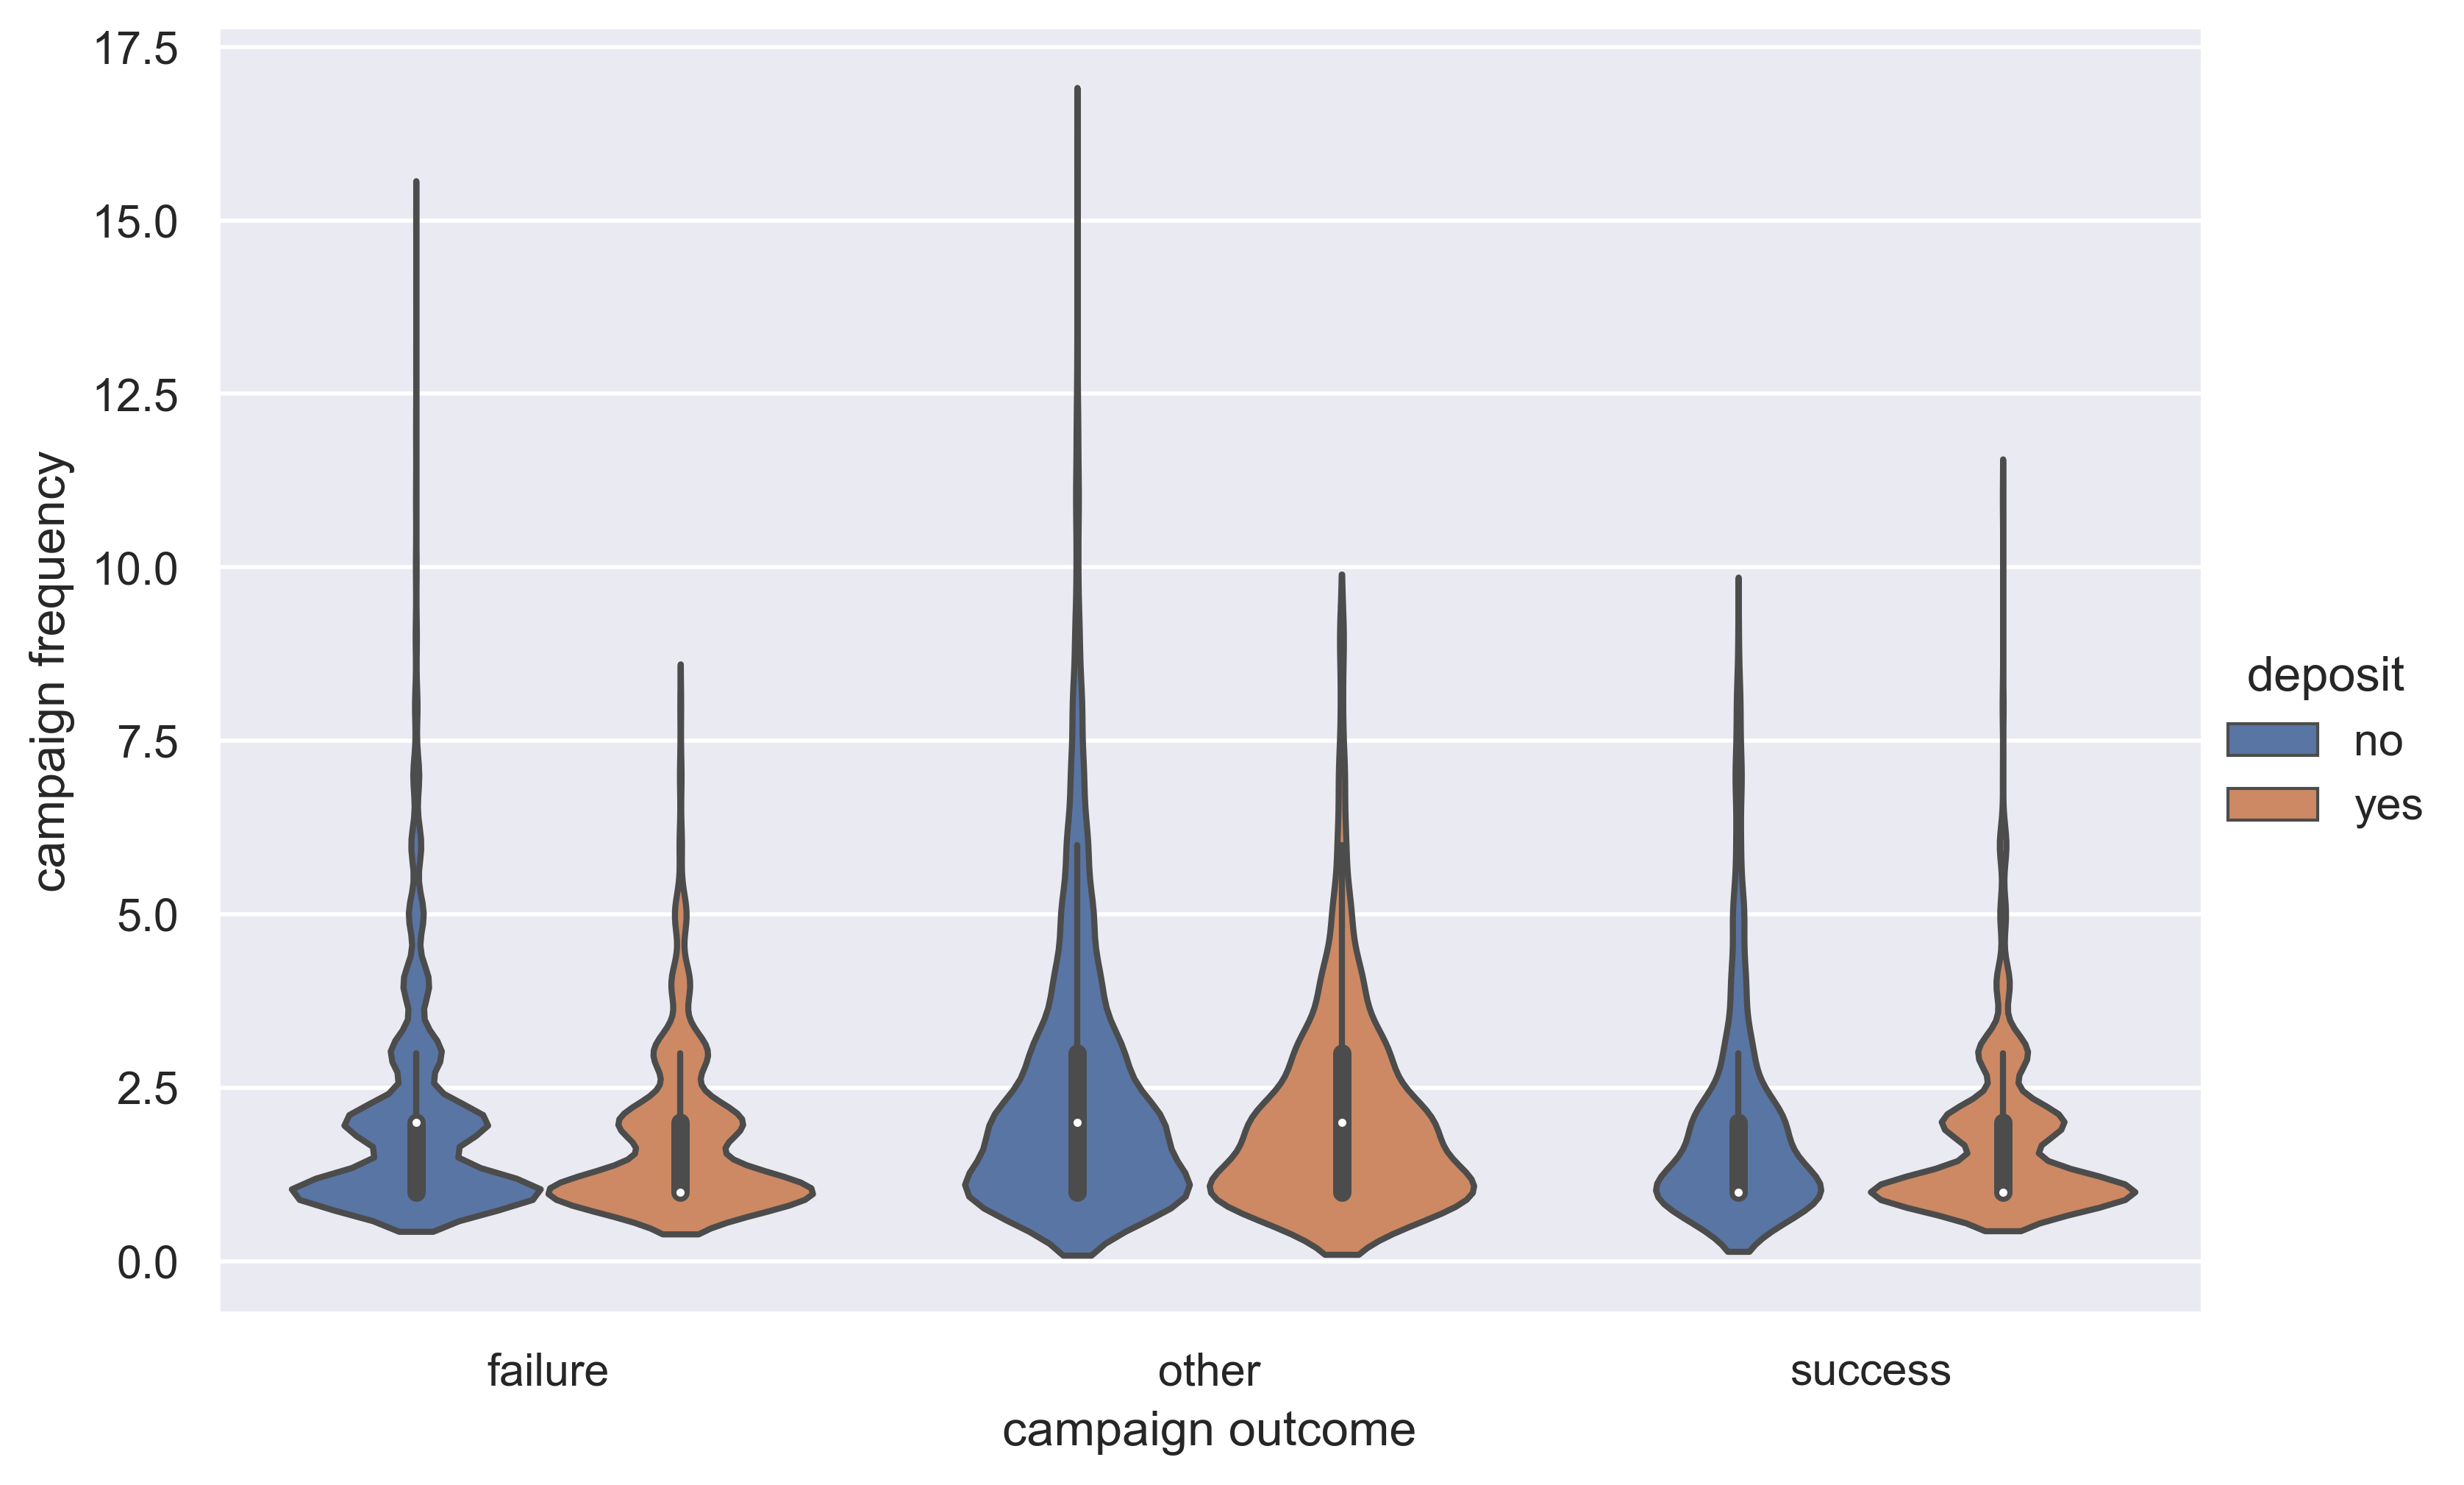

In [154]:
outcome=original_df[original_df['poutcome']!='unknown']
outcome['poutcome'].value_counts()
sns.set(rc={"figure.dpi":400});
fig=sns.catplot(x="poutcome", y="campaign", hue="deposit",
            data=outcome,orient='v',
            kind="violin",height=5,aspect=1.5)
plt.xlabel('campaign outcome');
plt.ylabel('campaign frequency');

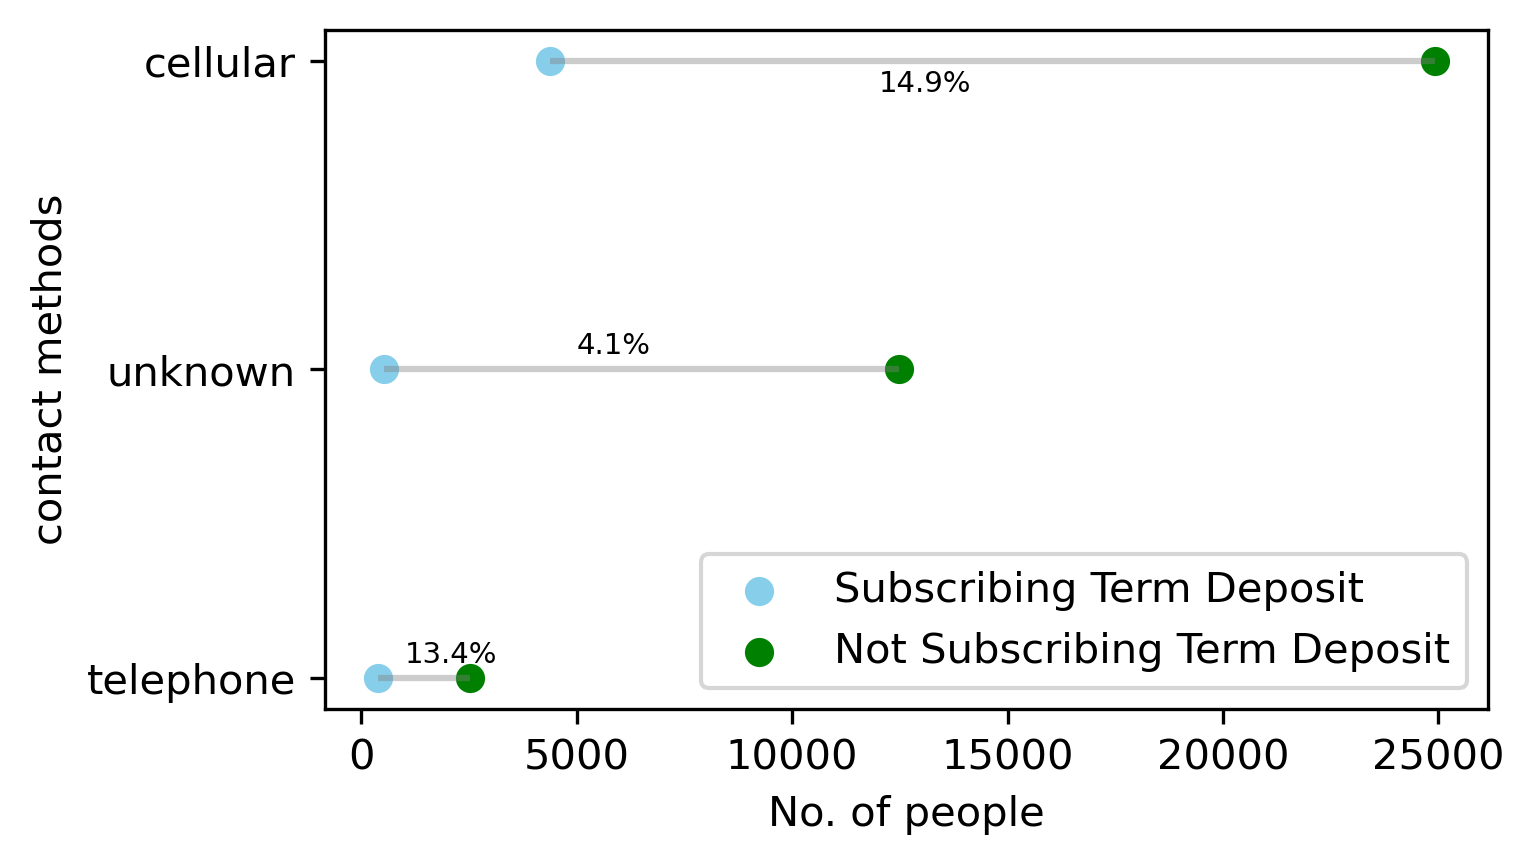

In [141]:
# contact methods
contact=pd.crosstab(original_df['contact'],original_df['deposit'])
contact.reset_index(inplace=True)
contact=contact[['contact','no','yes']]
contact=contact.sort_values(by='no')
my_range=range(1,len(contact.index)+1)
contact['sum']=contact['no']+contact['yes']
contact['pct_subscribe']=contact['yes']/contact['sum']

plt.figure(figsize=(5,3),dpi=300)
plt.hlines(y=my_range, xmin=contact['yes'], xmax=contact['no'], color='grey', alpha=0.4)
plt.scatter(contact['yes'], my_range, color='skyblue', label='Subscribing Term Deposit')
plt.scatter(contact['no'], my_range, color='green' , label='Not Subscribing Term Deposit')
plt.legend()

# Add title and axis names
plt.yticks(my_range, contact['contact'])
plt.xlabel('No. of people')
plt.ylabel('contact methods')

plt.text(1000,1.05,'13.4%',fontsize=7) # tele
plt.text(5000,2.05,'4.1%',fontsize=7) # unkn
plt.text(12000,2.9,'14.9%',fontsize=7) # ce
# Show the graph
plt.show();

In [139]:
education

deposit  education     no   yes    sum  pct_subscribe
3          unknown   1605   252   1857       0.135703
0          primary   6260   591   6851       0.086265
2         tertiary  11305  1996  13301       0.150064
1        secondary  20752  2450  23202       0.105594

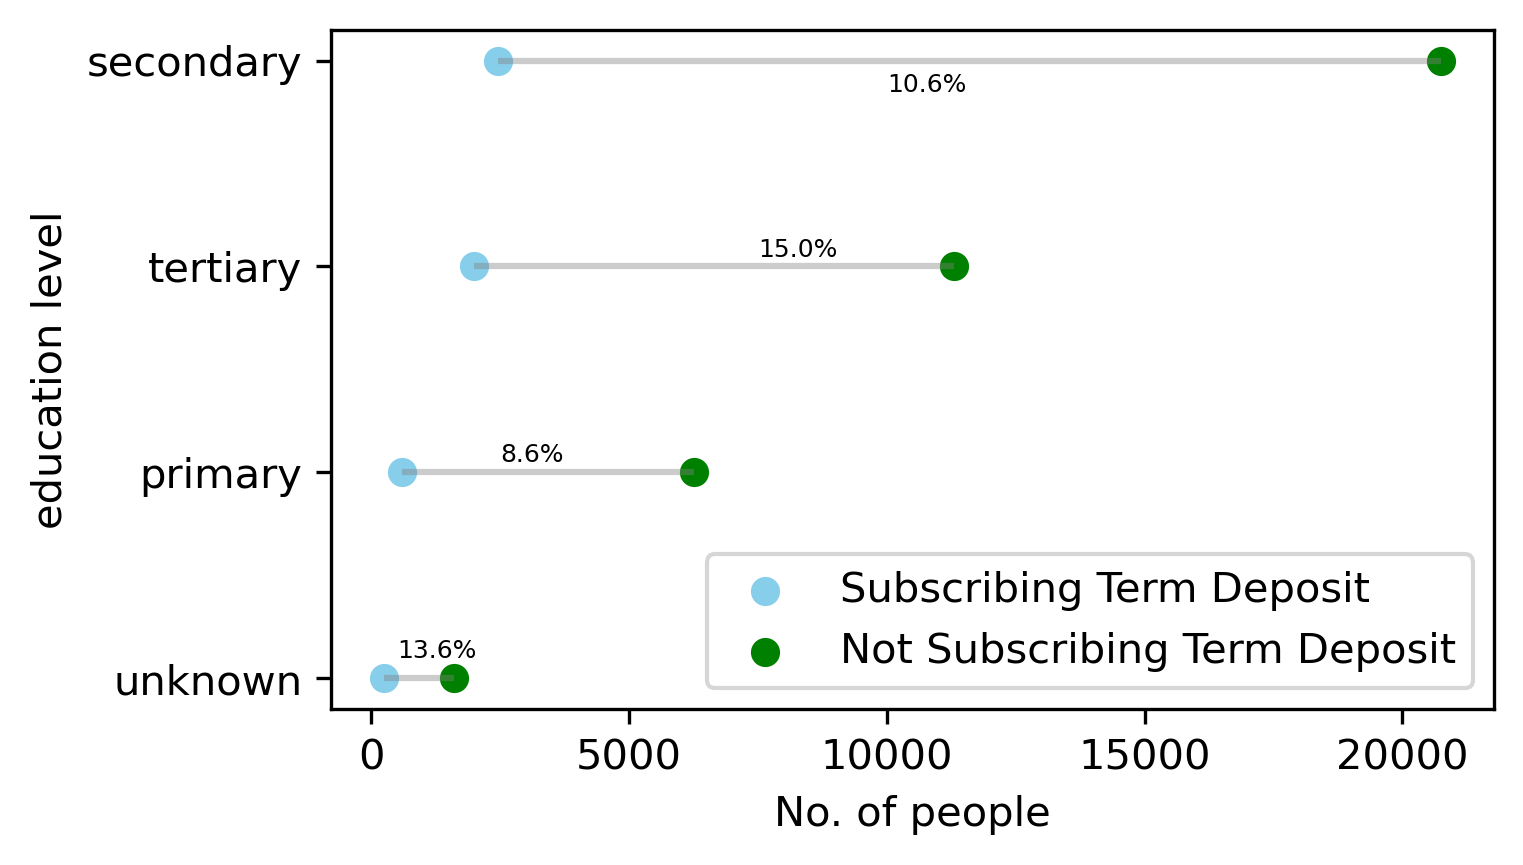

In [146]:
# education
education=pd.crosstab(original_df['education'],original_df['deposit'])
education.reset_index(inplace=True)
education=education[['education','no','yes']]
education['sum']=education['no']+education['yes']
education['pct_subscribe']=education['yes']/education['sum']
education=education.sort_values(by='no')
my_range=range(1,len(education.index)+1)

plt.figure(figsize=(5,3),dpi=300)
plt.hlines(y=my_range, xmin=education['yes'], xmax=education['no'], color='grey', alpha=0.4)
plt.scatter(education['yes'], my_range, color='skyblue', label='Subscribing Term Deposit')
plt.scatter(education['no'], my_range, color='green' , label='Not Subscribing Term Deposit')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, education['education'])
plt.xlabel('No. of people')
plt.ylabel('education level')

plt.text(500,1.1,'13.6%',fontsize=6) # unkn
plt.text(2500,2.05,'8.6%',fontsize=6) # pri
plt.text(7500,3.05,'15.0%',fontsize=6) # ter
plt.text(10000,3.85,'10.6%',fontsize=6) # sec

# Show the graph
plt.show();

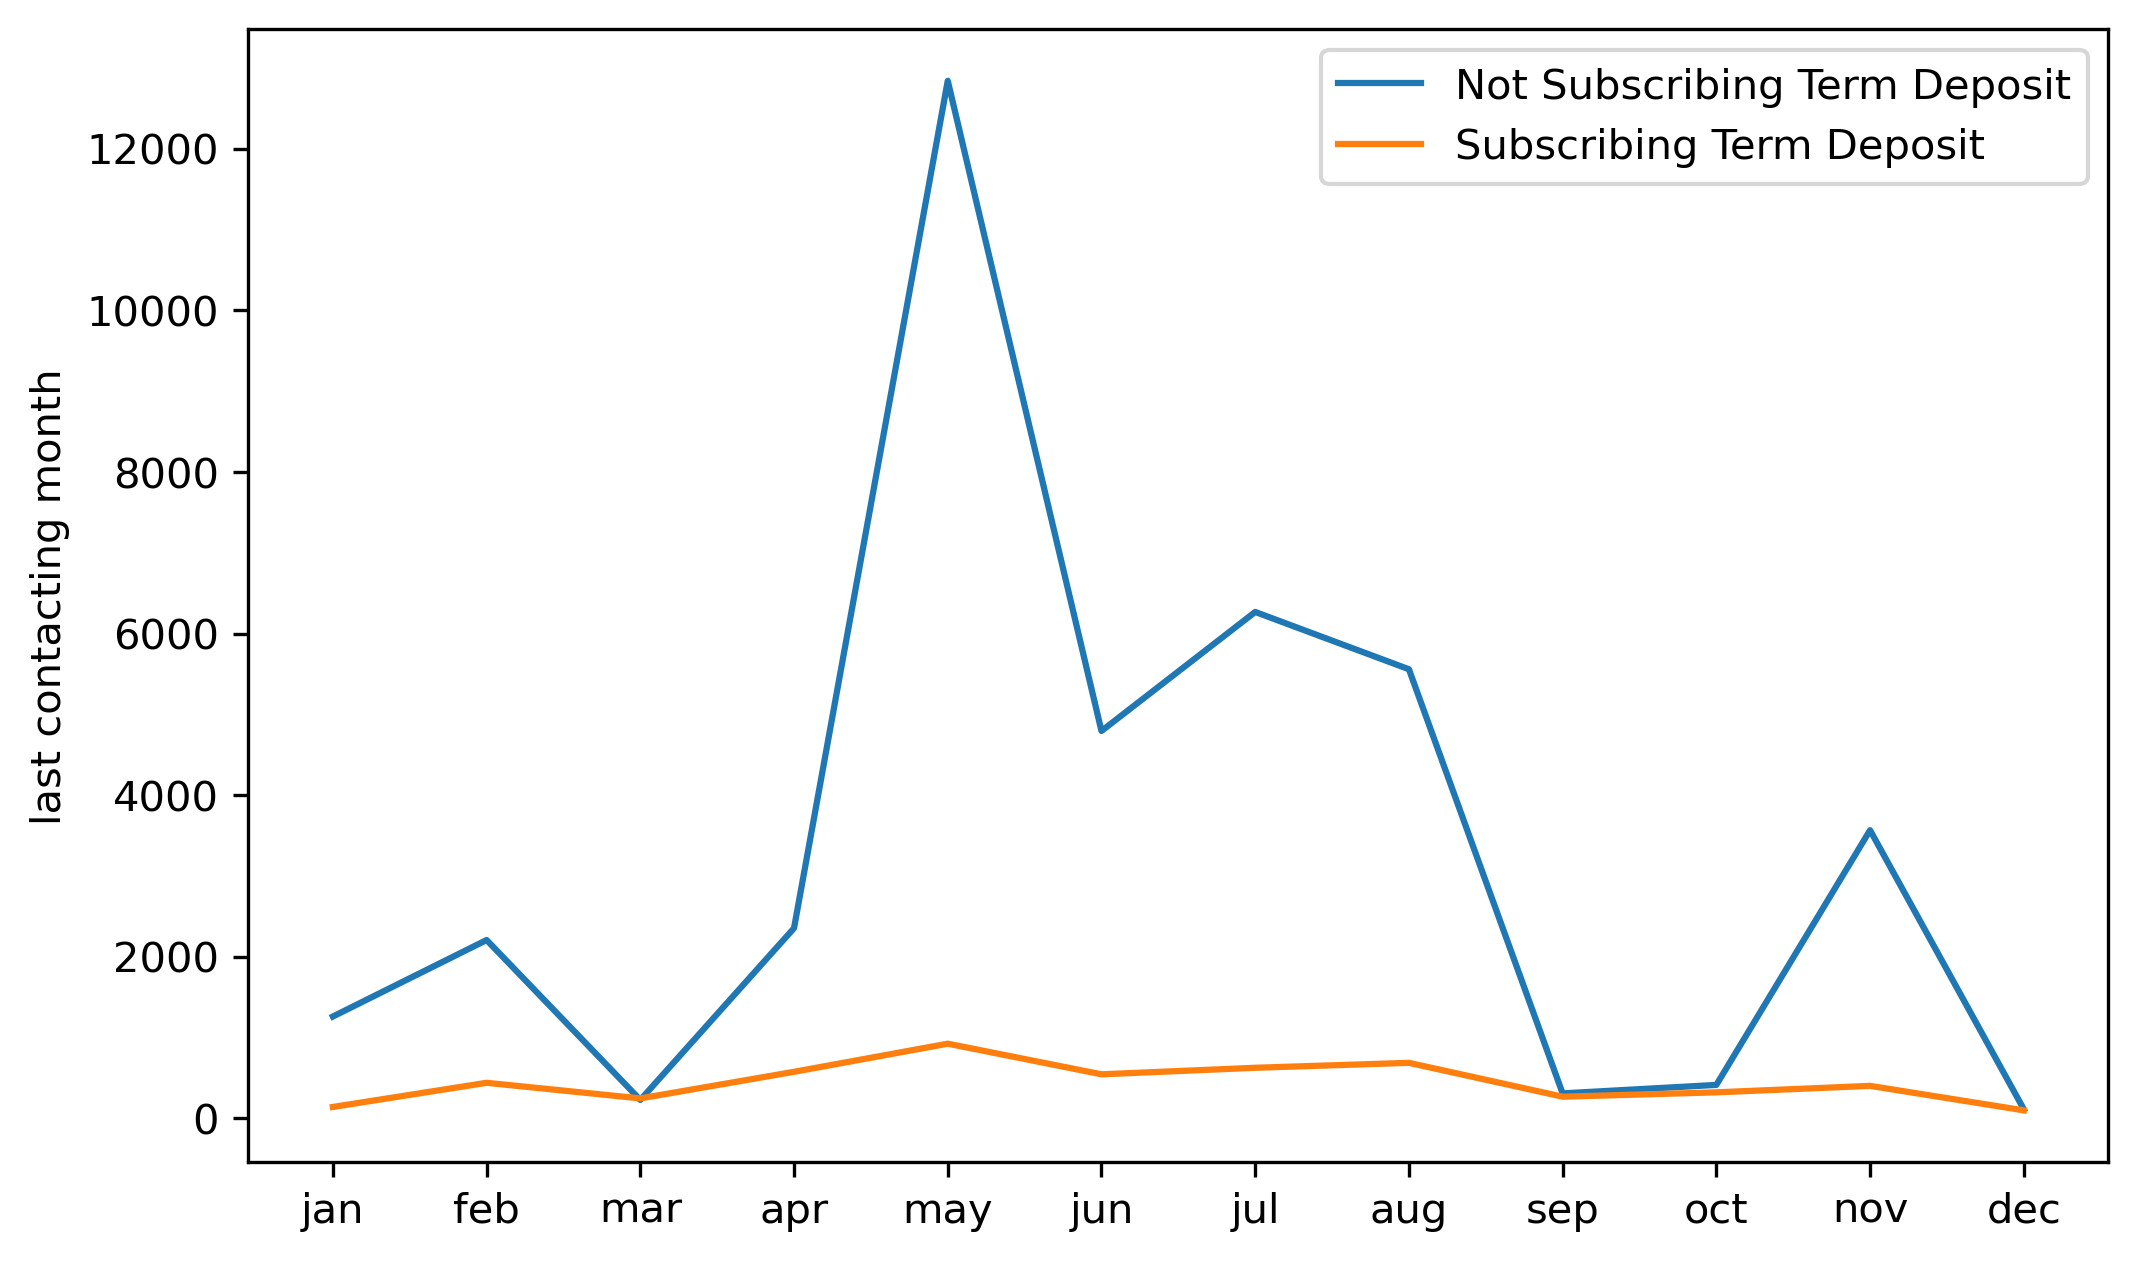

In [5]:
month=pd.crosstab(original_df['month'],original_df['deposit']).T
month=month[['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']].T
plt.figure(figsize=(8,5),dpi=300)
plt.plot(month['no'],label='Not Subscribing Term Deposit')
plt.plot(month['yes'],label='Subscribing Term Deposit')
plt.legend()
plt.ylabel('last contacting month')
plt.xticks(np.arange(12),month.index.values)
plt.show();

# Data Cleaning

In [3]:
original_df.isnull().sum()
original_df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:
label_encoder = LabelEncoder()
binary_columns=['default','housing','loan','deposit']

for columns in binary_columns:
    original_df[columns]=label_encoder.fit_transform(original_df[columns])

In [5]:
# one-hot coding
categorical_columns=['job','marital','contact','month','poutcome']

cleaned_df = pd.get_dummies(original_df, columns=categorical_columns)
cleaned_df.drop(['job_unknown','marital_single',
                'contact_unknown','poutcome_unknown','month_jan','day'],axis=1,inplace=True)
#drop days because that is meaningless

#  coding for ordinal categorical 'education'
cleaned_df["education"].replace(['unknown', 'primary','secondary','tertiary'], [0,1,2,3], inplace = True) 


In [6]:
mm_scaler = MinMaxScaler()
final_df = cleaned_df.copy()
final_df[['balance','age','duration','campaign','pdays','previous']] = mm_scaler.fit_transform(final_df[['balance','age','duration','campaign','pdays','previous']])

# Feature Selection

## 1 Chi Square Test (for categorical variables)

Null Hypothesis (H0): There is no relationship between the variables


Alternative Hypothesis (H1): There is a relationship between variables


If p-value ≥0.05 ,failed to reject null hypothesis there is no any relationship between target variable and categorical features.

if p_value <0.05 ,Rejects null hypothesis and there will be some relationship between target variable and categorical features and we will take all that features for further machine learning pipeline.let’s get started……

In [7]:
X=final_df.drop(['deposit','balance','age','education','duration','campaign','pdays','previous'],axis=1)
y=final_df['deposit']
chi_scores = chi2(X,y)
chi_scores

(array([2.23138750e+01, 3.88949715e+02, 1.76516137e+02, 1.27251346e+00,
        1.84348135e+02, 1.69039793e+01, 1.01521965e+01, 3.87436014e+01,
        2.69699331e+02, 3.18983602e-02, 3.18766416e+01, 2.61792961e+02,
        3.02633169e+00, 1.82547024e+01, 3.07471598e-01, 6.53527571e+01,
        2.94017126e+02, 8.34216579e+00, 1.80789070e+02, 2.83923330e+00,
        2.54219350e+02, 6.28165158e+01, 4.52929100e+01, 1.12591815e+01,
        7.49691937e+02, 3.30368818e+02, 9.20170458e+00, 7.34708162e+02,
        6.77273004e+02, 3.93918112e+00, 4.42871135e+01, 4.11300057e+03]),
 array([2.31527677e-006, 1.40128480e-086, 2.79337524e-040, 2.59295686e-001,
        5.44636953e-042, 3.93190691e-005, 1.44129414e-003, 4.83291904e-010,
        1.31958958e-060, 8.58250915e-001, 1.64280877e-008, 6.97747965e-059,
        8.19230407e-002, 1.93248285e-005, 5.79235874e-001, 6.26222525e-016,
        6.62645540e-066, 3.87353947e-003, 3.25939056e-041, 9.19880963e-002,
        3.12329826e-057, 2.26888266e-015, 

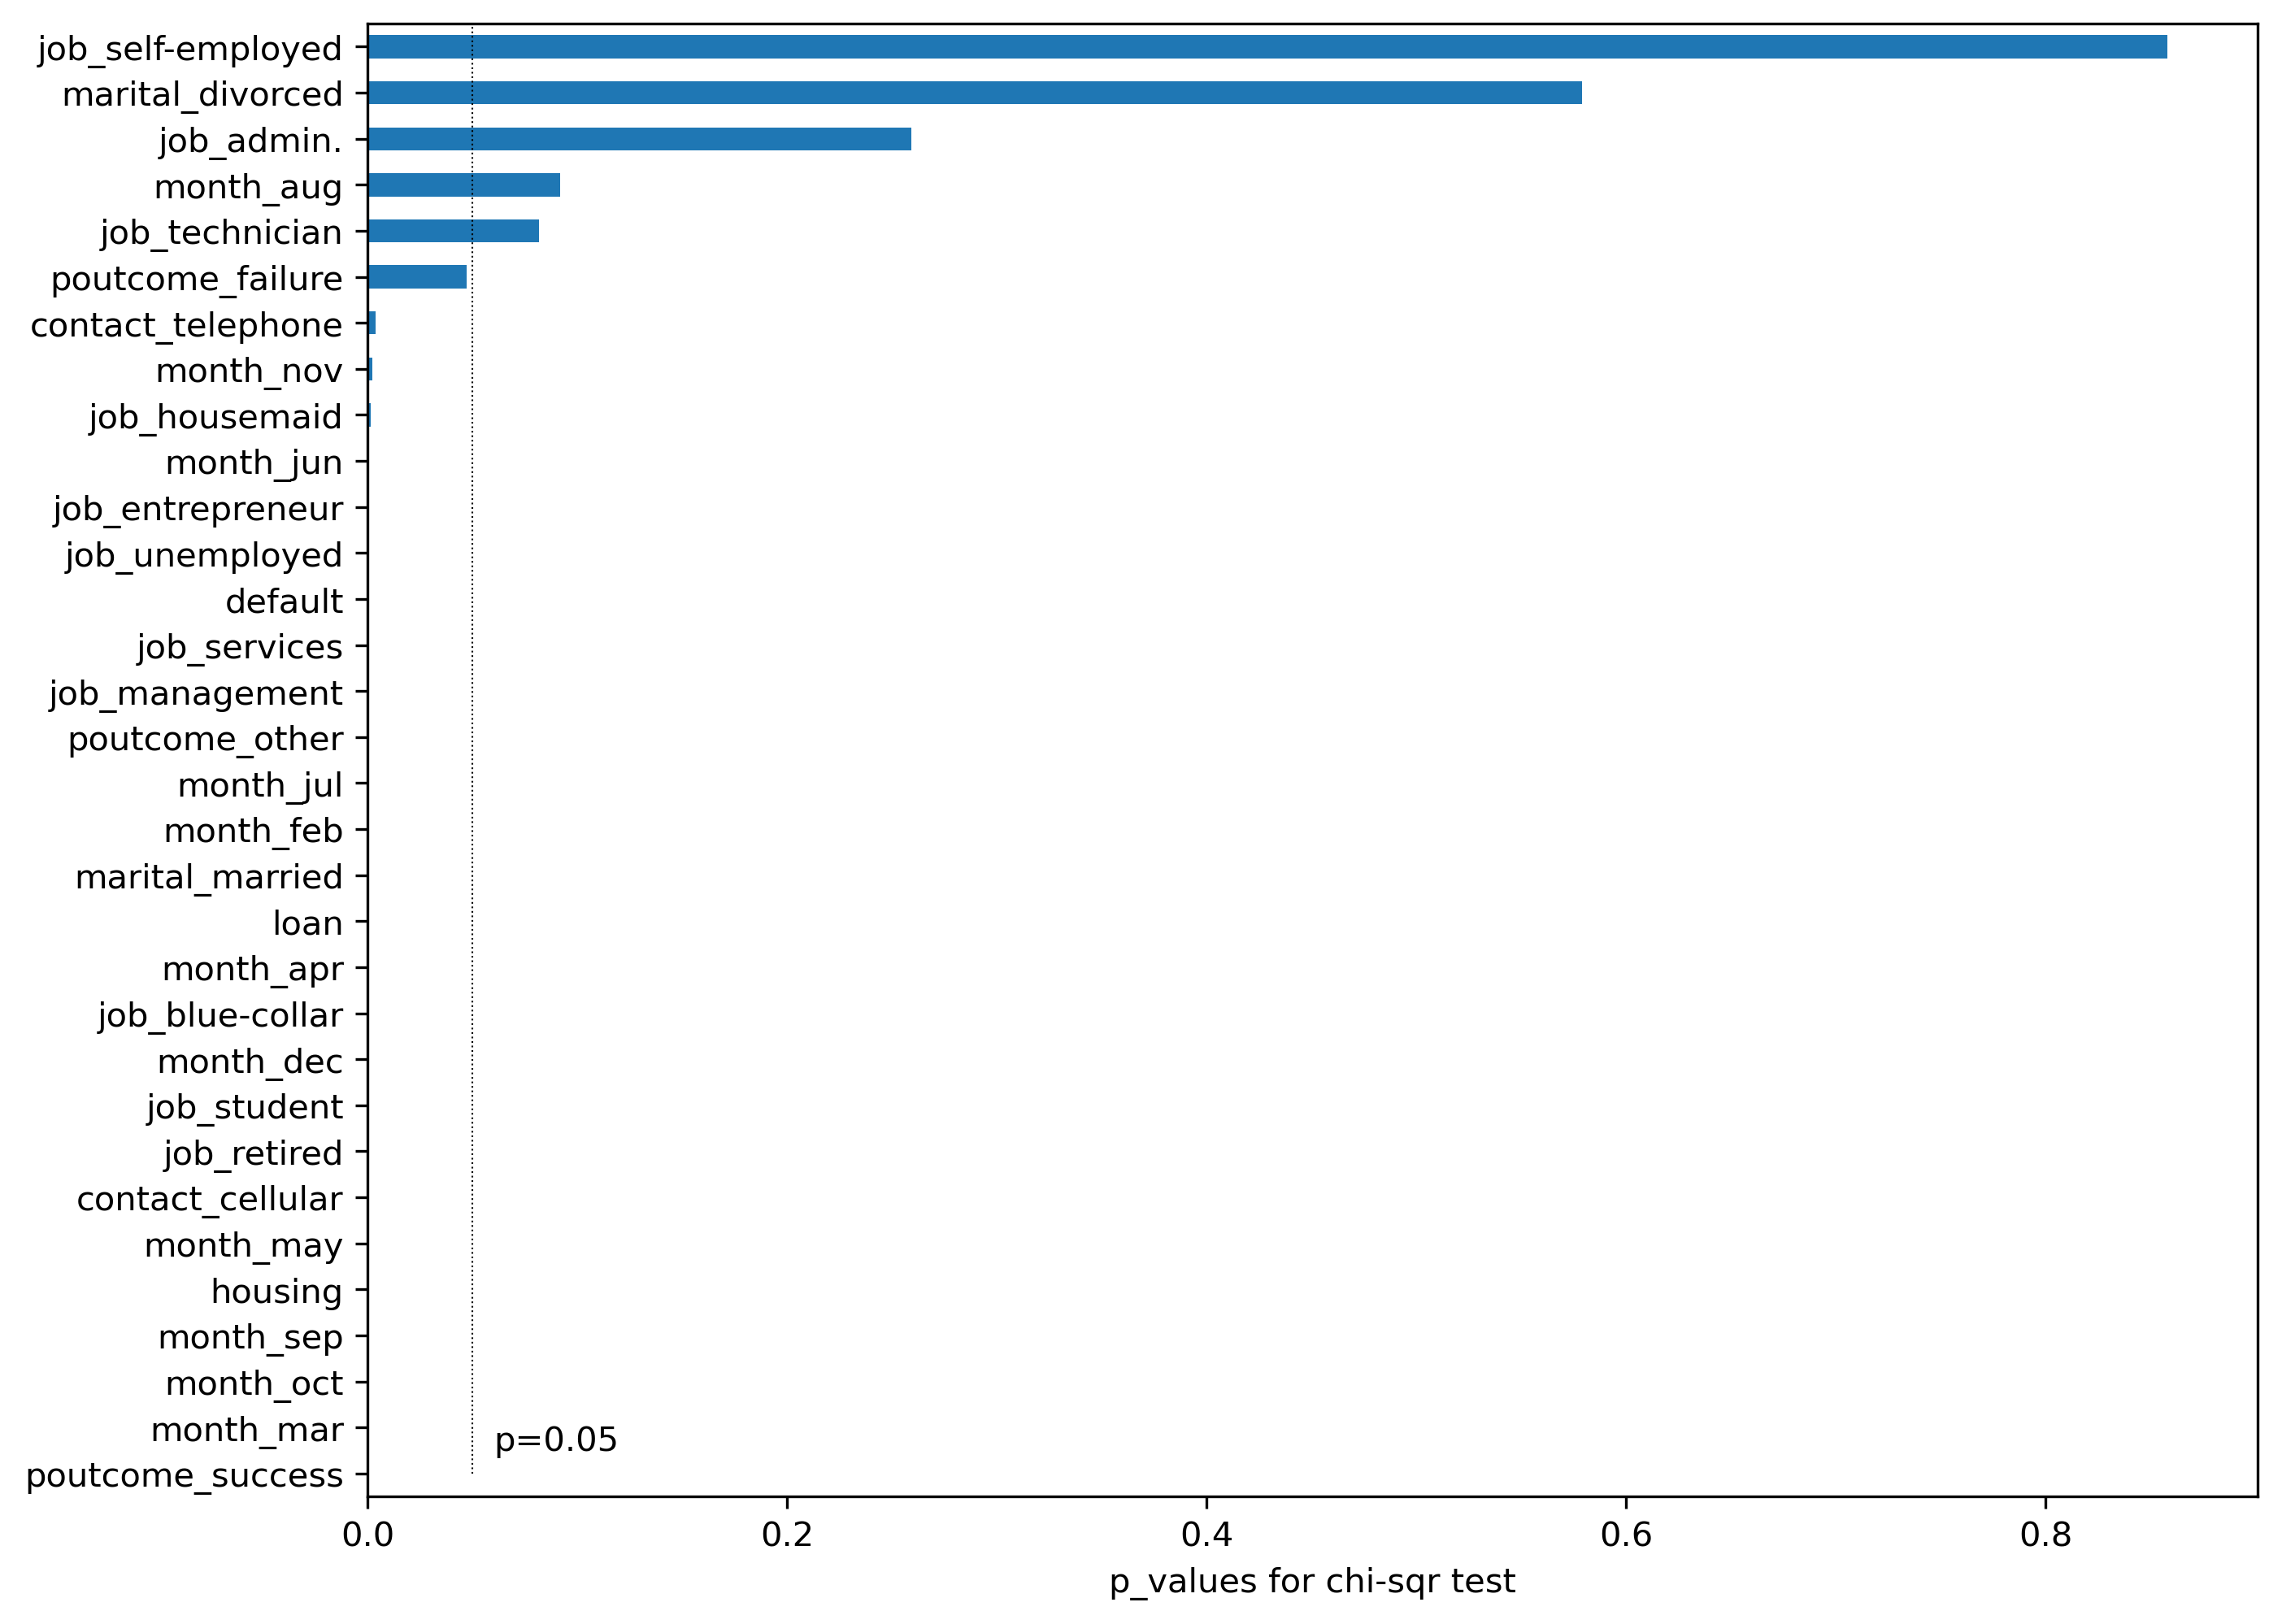

In [8]:
%matplotlib inline
#p-value
p_values = pd.Series(chi_scores[1],index=X.columns)
p_values=p_values.sort_values(ascending=True)

plt.figure(dpi=300);
p_values.plot(kind='barh',figsize=(10,8),fontsize=10)
plt.vlines(0.05,ymin=0,ymax=50,linestyles='dotted',color='black',linewidth=0.5)
plt.xlabel('p_values for chi-sqr test',fontsize=10)
plt.text(0.06,0.5,'p=0.05',fontsize=10);

In [9]:
p_values=pd.DataFrame({'p_value':chi_scores[1],
                      'variable': list(X.columns)})
for i in p_values[p_values['p_value']>0.05]['variable']:
    final_df.drop(i,axis=1,inplace=True)

## 2 Kruskal-Wallis H test (for between numerical variables and categorical)

Fail to Reject H0: All sample distributions are equal.

Reject H0: One or more sample distributions are not equal.

In [10]:
num_columns=['balance','age','duration','campaign','pdays','previous']

In [11]:
variable=[]
statistics=[]
p_value=[]
for i in num_columns:
    category_yes=final_df[final_df['deposit']==1][i]
    category_no=final_df[final_df['deposit']==0][i]
    stat, p = kruskal(category_yes, category_no)
    variable.append(i)
    statistics.append(stat.round(2))
    p_value.append(p.round(3))
    print(f'For variable "{i}": Statistics = {stat:.3f}, p = {p:.3f}')

p_values_h_test=pd.DataFrame({'Variable':variable,
                             "Statistics":statistics,
                            'p-value':p_value})

For variable "balance": Statistics = 454.774, p = 0.000
For variable "age": Statistics = 3.461, p = 0.063
For variable "duration": Statistics = 5302.445, p = 0.000
For variable "campaign": Statistics = 319.409, p = 0.000
For variable "pdays": Statistics = 1072.964, p = 0.000
For variable "previous": Statistics = 1293.144, p = 0.000


In [12]:
final_df.drop('age',axis=1,inplace=True)

## correlation map

<Figure size 3000x3000 with 0 Axes>

<AxesSubplot:>

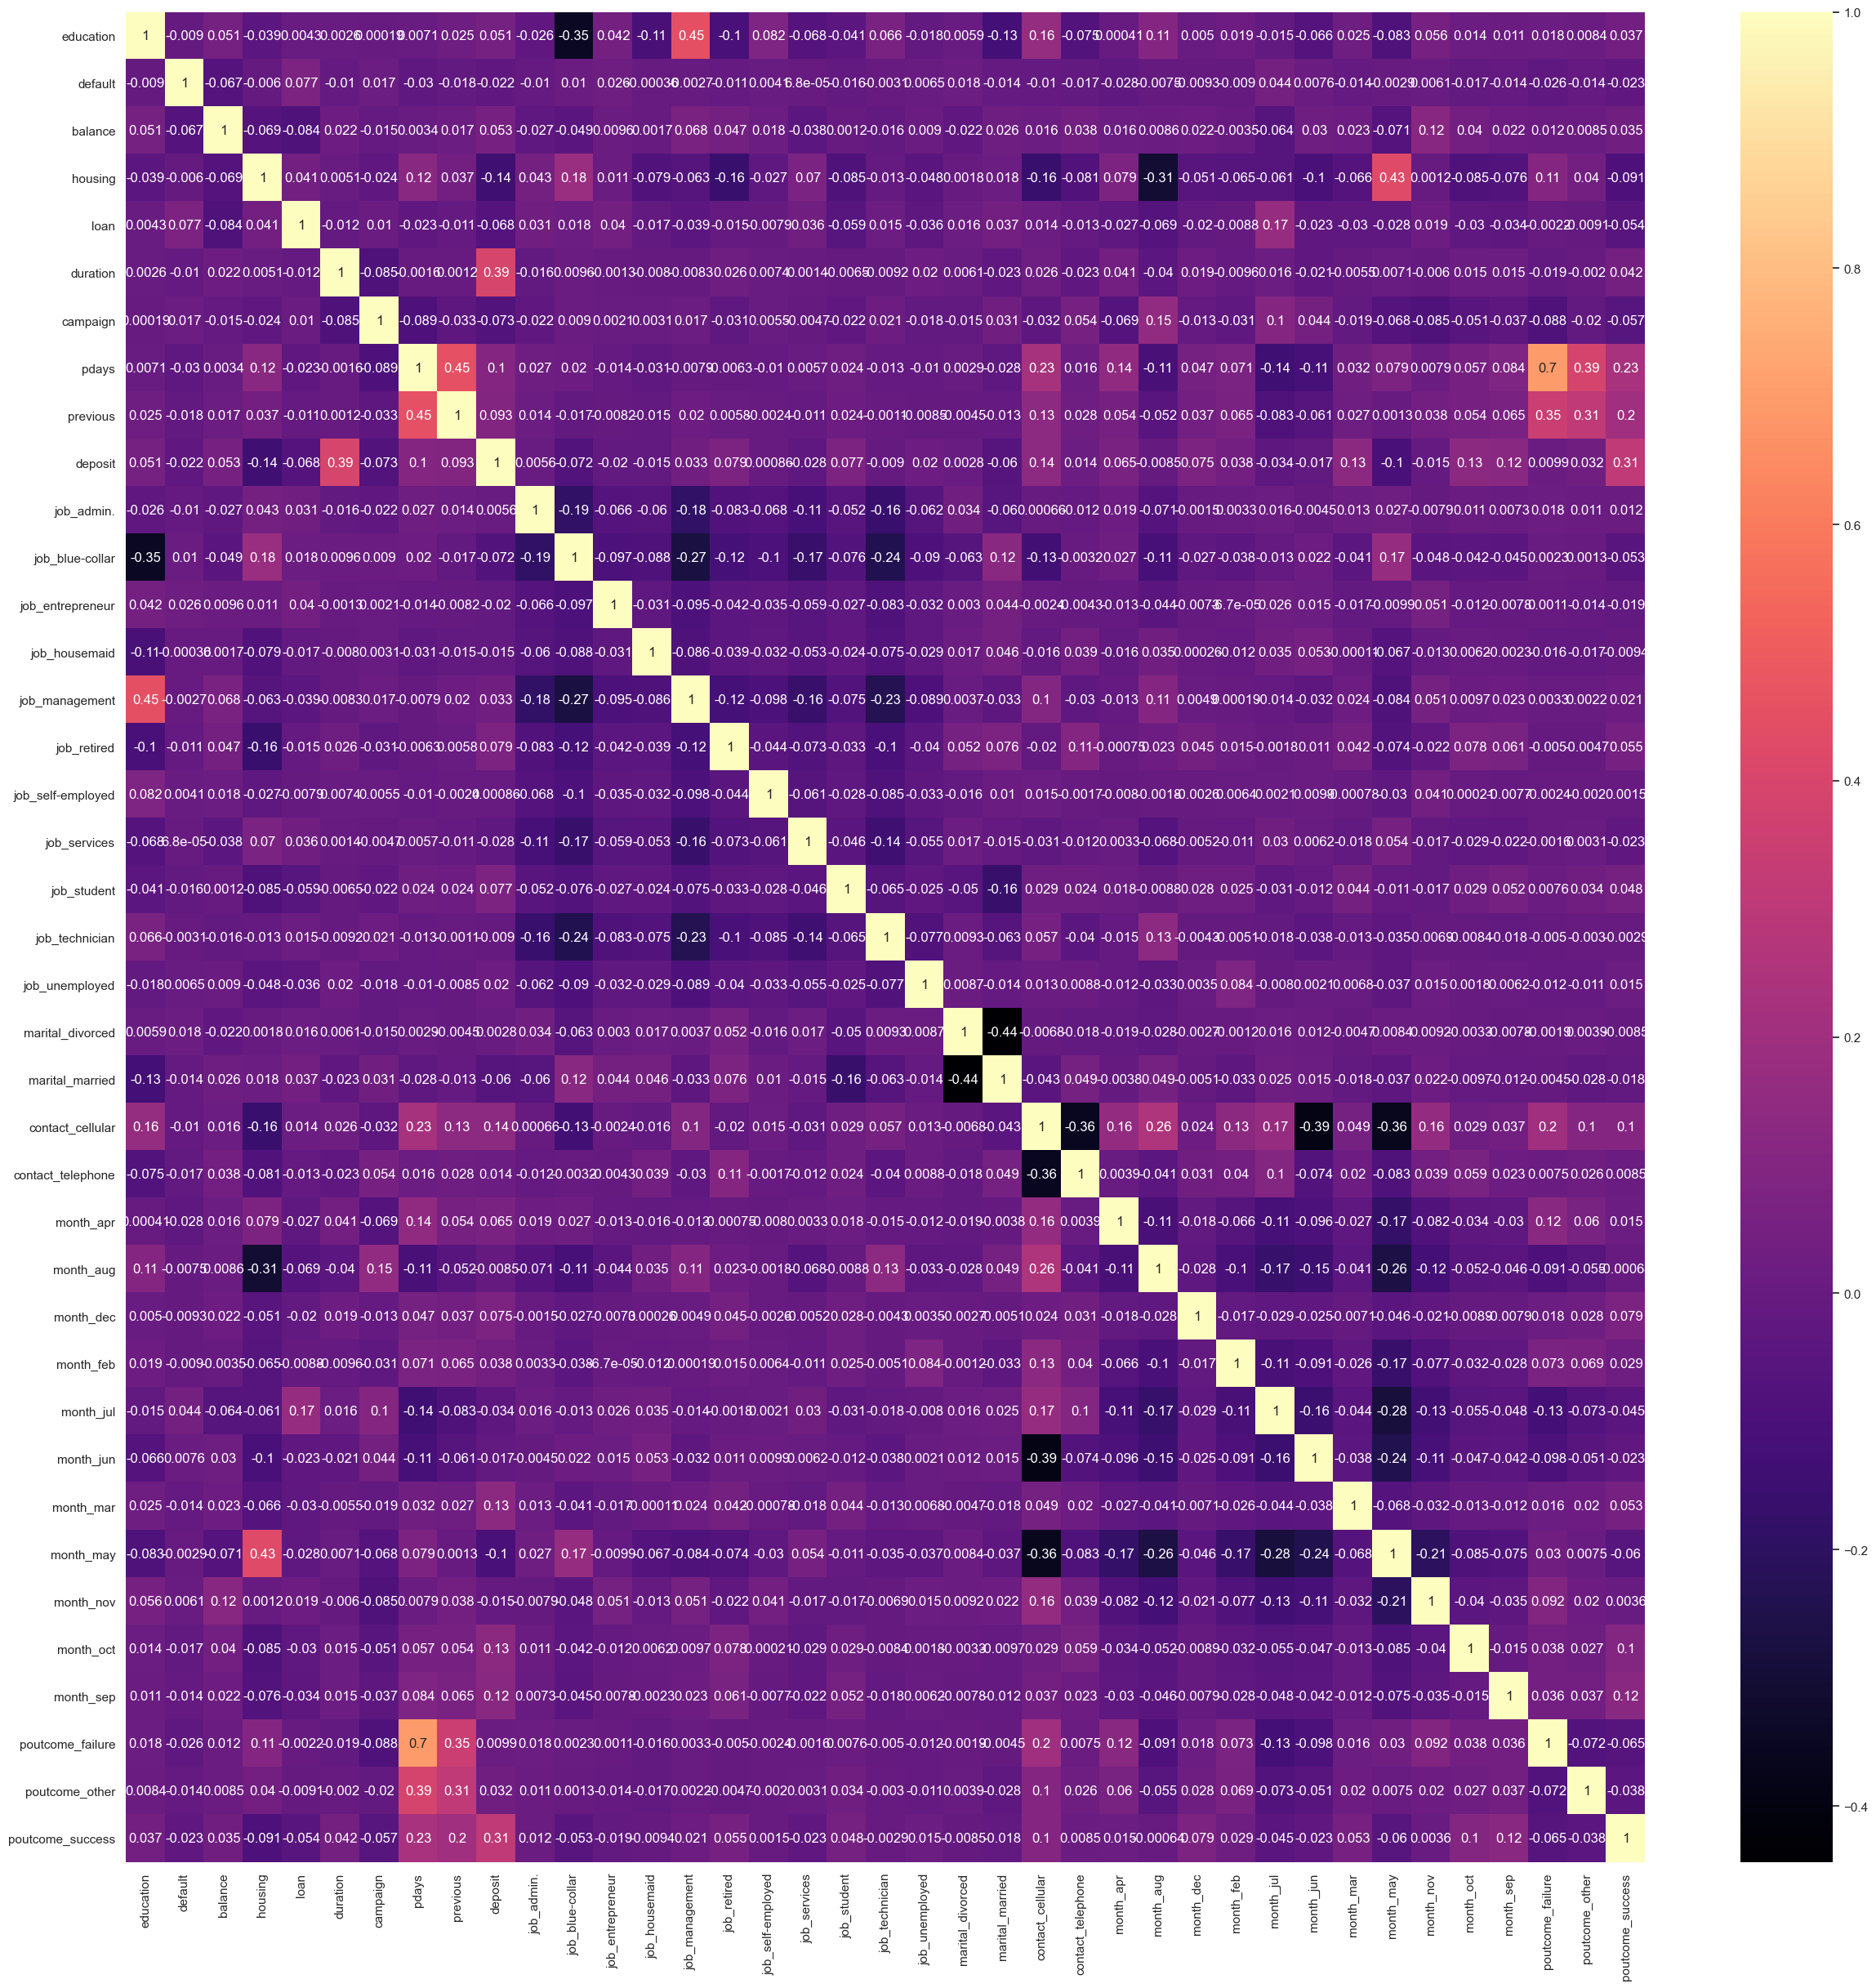

In [238]:
plt.figure(figsize = (30,30),dpi=100)
sns.heatmap(final_df.corr(), annot = True, cmap = "magma")
plt.savefig('correlation.png')

# Train Model


In [13]:
X = final_df.drop(['deposit'], axis=1)
y = final_df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42, stratify=y)
y_train.value_counts()

0    27945
1     3702
Name: deposit, dtype: int64

In [14]:
len(y_train)
len(y_test)

31647

13564

### Smote and ENN

In [15]:
sme = SMOTEENN(random_state=42)

In [16]:
X_train, y_train = sme.fit_resample(X_train, y_train)
Counter(y_train)

Counter({0: 22624, 1: 23038})

# Hyperparameter Tuning

In [23]:
## define a function to quickly draw confusion matrix for each model
def plot_confusion_matrix (predict_value):
    data=confusion_matrix(y_test, predict_value)
    matrix = pd.DataFrame(data=data,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (9,8),dpi=100)
    sns.heatmap(matrix, annot = True, cmap = "magma", fmt = "g")

## 1 Logistoc Regression

In [82]:
# LR hyper tuning
lr_params = {'penalty': ['l1', 'l2'],'C':[1,1.5,1.8,5,10]}
lr_clf = GridSearchCV(LogisticRegression(solver='liblinear'), lr_params
                      ,scoring = 'accuracy', cv=5)
lr_best = lr_clf.fit(X_train, y_train)

lr_predict = lr_best.predict(X_test)

lr_cv=cross_val_score(lr_best, X_test, y_test, cv=5, scoring="accuracy")

In [83]:
lr_best.best_params_

{'C': 1, 'penalty': 'l1'}

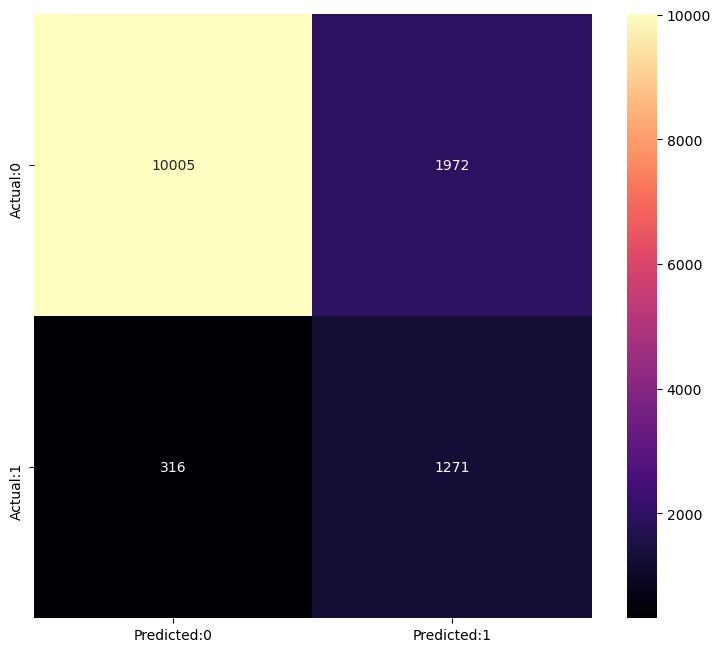

In [84]:
plot_confusion_matrix(lr_predict)

## 2. K-Nearest Neighbors

In [61]:
knn_params = { 'n_neighbors' : [10,13,15,17,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn_clf = GridSearchCV(KNeighborsClassifier(), knn_params, verbose = 1, cv=5, n_jobs = -1,scoring = 'recall')
knn_best= knn_clf.fit(X_train, y_train)
knn_predict = knn_best.predict(X_test)
knn_cv=cross_val_score(knn_best, X_test, y_test, cv=5, scoring="accuracy")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [62]:
knn_best.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

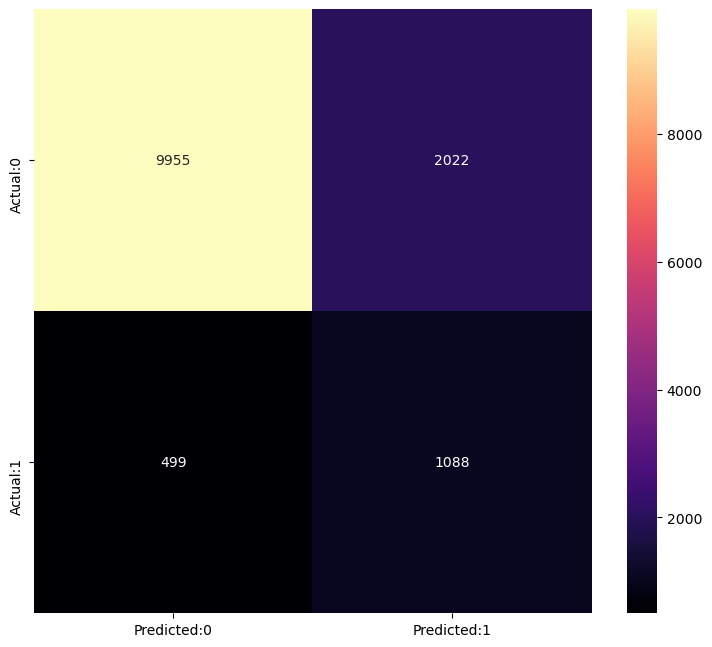

In [65]:
plot_confusion_matrix (knn_predict)

## 3. Decision Tree

In [67]:
%%capture 
#hide the output
dt_params ={'criterion': ['gini', 'entropy'],
            'max_depth':[10,12,15,20,30],
           'min_samples_leaf':[25,27,30,35],
           'min_samples_split':[1,2,3,4]}
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=dt_params,
                      n_jobs=-1,cv=5,
                      verbose=1,scoring = 'recall')
dt_best= dt_clf.fit(X_train, y_train)
dt_predict = dt_best.predict(X_test)

dt_cv=cross_val_score(dt_best, X_train, y_train, cv=5, scoring="accuracy")

In [68]:
dt_best.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 35,
 'min_samples_split': 2}

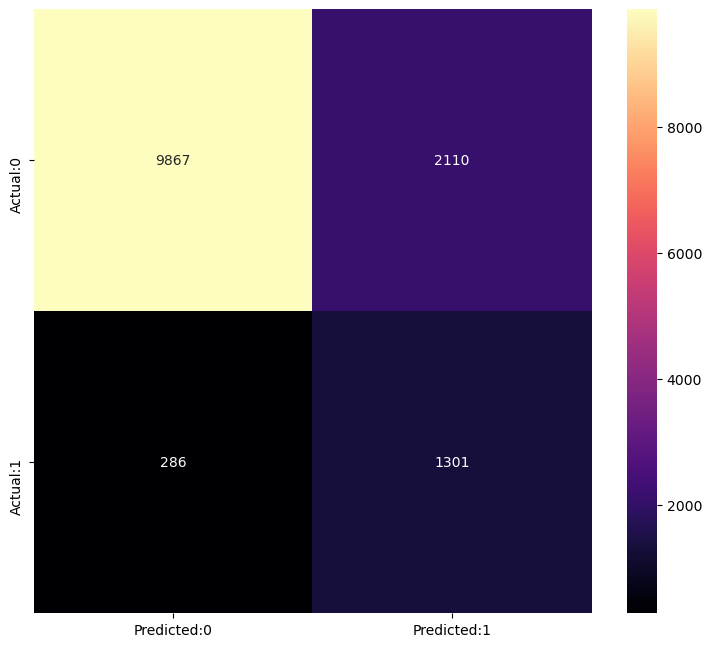

In [69]:
plot_confusion_matrix (dt_predict)

## 4. Random Forest

In [77]:
rf_params = {'bootstrap': [True, False],
             'max_depth': [15,35,50],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [300,500,1000]}
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params,
                      n_jobs=-1,cv=3, 
                      verbose=1,scoring = 'recall')
rf_best = rf_clf.fit(X_train, y_train)
rf_predict=rf_best.predict(X_test)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [102]:
rf_best.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

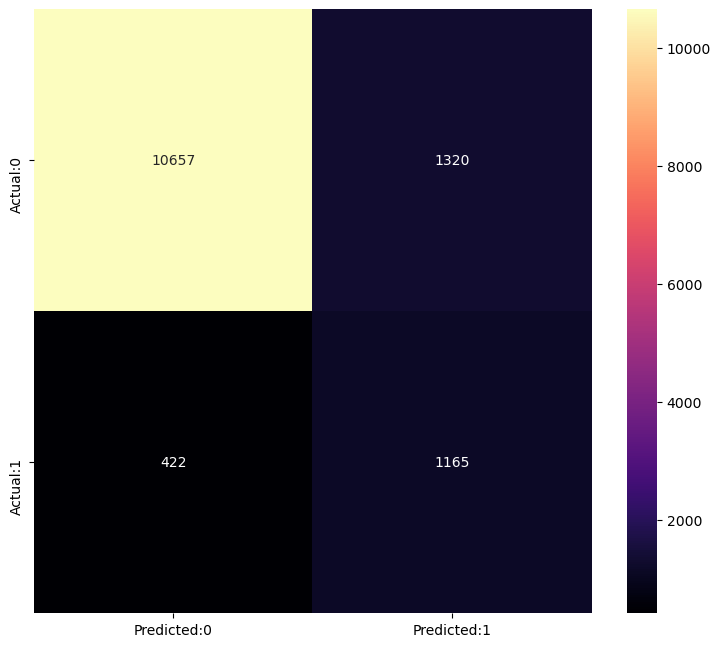

In [79]:
plot_confusion_matrix (rf_predict)

# 5. MLP

In [111]:
mlp_params = {'hidden_layer_sizes': [(150,), (200,), (250,)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'alpha': [0.0001, 0.05],
              'learning_rate': ['constant','adaptive']}

mlp_clf = GridSearchCV(MLPClassifier(max_iter=100,random_state=42), param_grid=mlp_params, n_jobs=-1, cv=5)
mlp_best=mlp_clf.fit(X_train, y_train)
mlp_predict=mlp_best.predict(X_test)

/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [112]:
mlp_best.best_estimator_

MLPClassifier(hidden_layer_sizes=(250,), max_iter=100, random_state=42)

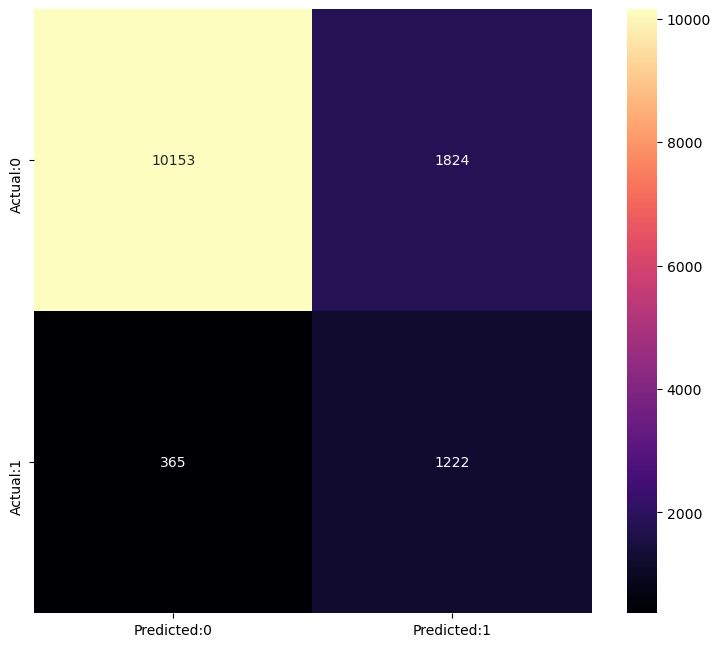

In [113]:
plot_confusion_matrix (mlp_predict)

# Evaluation

In [148]:
lr_cv=cross_val_score(lr_best.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")
knn_cv=cross_val_score(knn_best.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")
dt_cv=cross_val_score(dt_best.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")
rf_cv=cross_val_score(rf_best.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")
mlp_cv=cross_val_score(mlp_best.best_estimator_, X_train, y_train, cv=3, scoring="accuracy")

/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
Accuracy_score=[]
Recall_score= []
Precision_score=[]
F1_score=[]
auc_score=[]

predicted_value = [lr_predict,knn_predict,dt_predict,rf_predict,mlp_predict]

for classifiers in predicted_value:
    Accuracy_score.append(accuracy_score(y_test,classifiers).round(3))
    Recall_score.append(recall_score(y_test,classifiers).round(3))
    Precision_score.append(precision_score(y_test,classifiers).round(3))
    F1_score.append(f1_score(y_test,classifiers).round(3))
    auc_score.append(roc_auc_score(y_test,classifiers).round(3))

Scores={'Model':['Logistic Regression','KNN','Decision Tree','Random Forest','MLP'],
       'Accuracy':Accuracy_score,
       'Recall':Recall_score,
       'Precision':Precision_score,
       'f1':F1_score,
       'AUC':auc_score}
comparision_table=pd.DataFrame(Scores)

comparision_table

Model  Accuracy  Recall  Precision     f1    AUC
0  Logistic Regression     0.831   0.801      0.392  0.526  0.818
1                  KNN     0.814   0.686      0.350  0.463  0.758
2        Decision Tree     0.823   0.820      0.381  0.521  0.822
3        Random Forest     0.872   0.734      0.469  0.572  0.812
4                  MLP     0.839   0.770      0.401  0.528  0.809

In [159]:
comparision_table.sort_values(by='Accuracy',ascending=False)[['Model','Accuracy']]

Model  Accuracy
3        Random Forest     0.872
4                  MLP     0.839
0  Logistic Regression     0.831
2        Decision Tree     0.823
1                  KNN     0.814

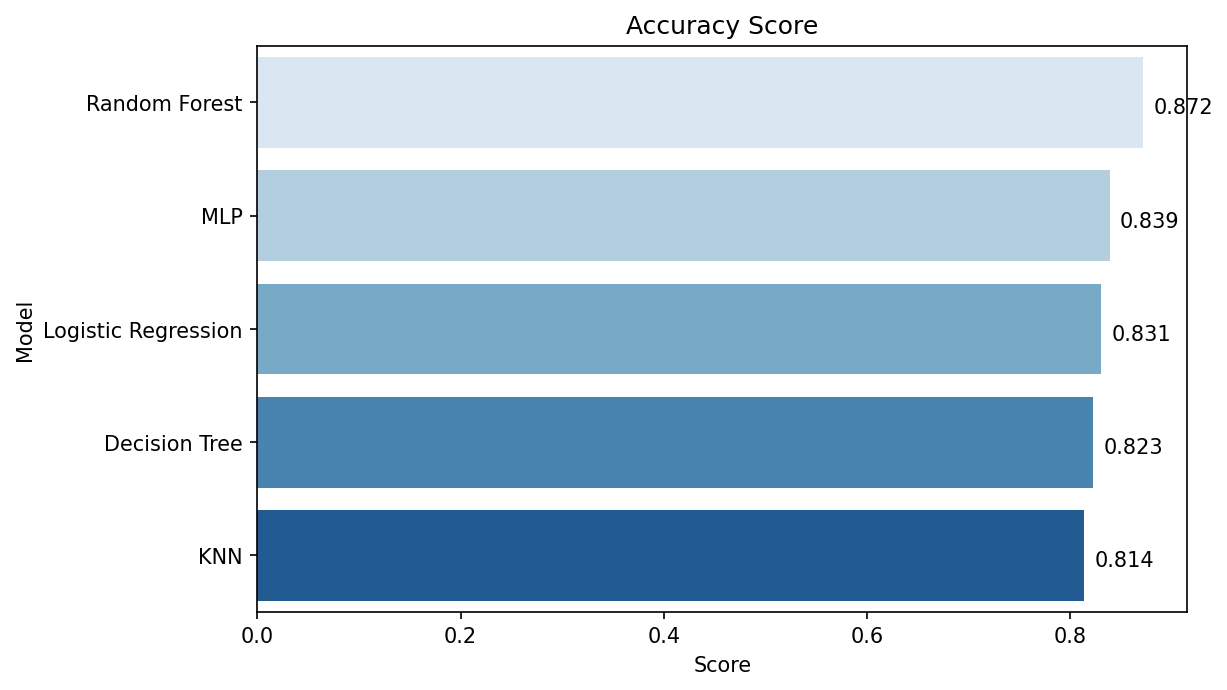

In [265]:
accuracy=comparision_table.sort_values(by='Accuracy',ascending=False)[['Model','Accuracy']].copy()

plt.figure(figsize=(8,5),dpi=150)
sns.barplot(y = accuracy['Model'], x = accuracy['Accuracy'], palette = "Blues") ;
plt.title("Accuracy Score");
for i, v in enumerate(accuracy['Accuracy']):
    plt.text(v + 0.01, i+0.1, str(v), color='black',fontsize=10)
plt.xlabel('Score');

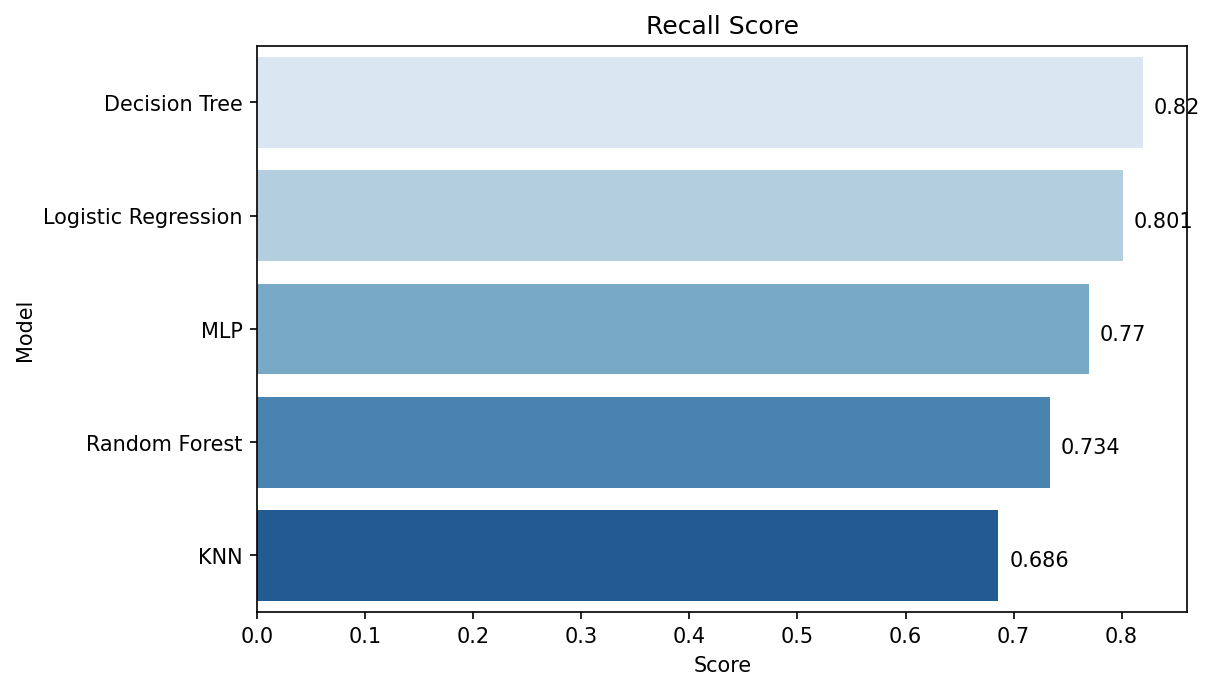

In [266]:
recall=comparision_table.sort_values(by='Recall',ascending=False)[['Model','Recall']].copy()

plt.figure(figsize=(8,5),dpi=150)
sns.barplot(y = recall['Model'], x = recall['Recall'], palette = "Blues") ;
plt.title("Recall Score");
for i, v in enumerate(recall['Recall']):
    plt.text(v + 0.01, i+0.1, str(v), color='black',fontsize=10)
plt.xlabel('Score');

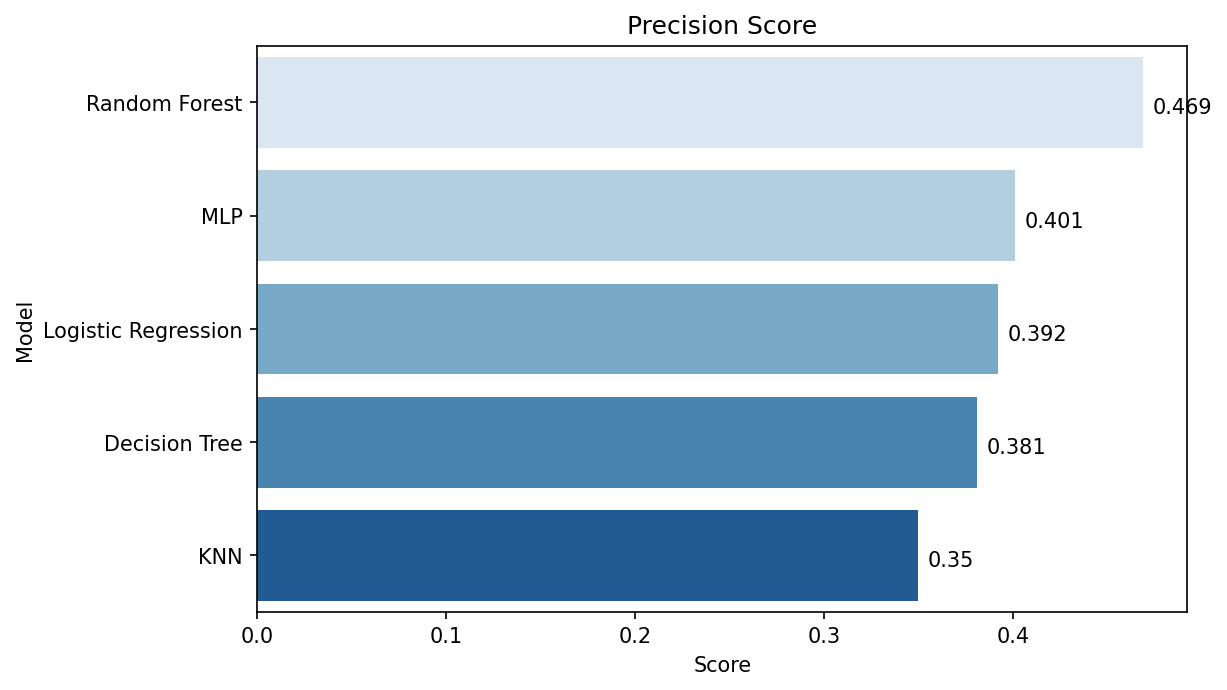

In [270]:
precision=comparision_table.sort_values(by='Precision',ascending=False)[['Model','Precision']].copy()

plt.figure(figsize=(8,5),dpi=150)
sns.barplot(y = precision['Model'], x = precision['Precision'], palette = "Blues") ;
plt.title("Precision Score");
for i, v in enumerate(precision['Precision']):
    plt.text(v + 0.005, i+0.1, str(v), color='black',fontsize=10)
plt.xlabel('Score');

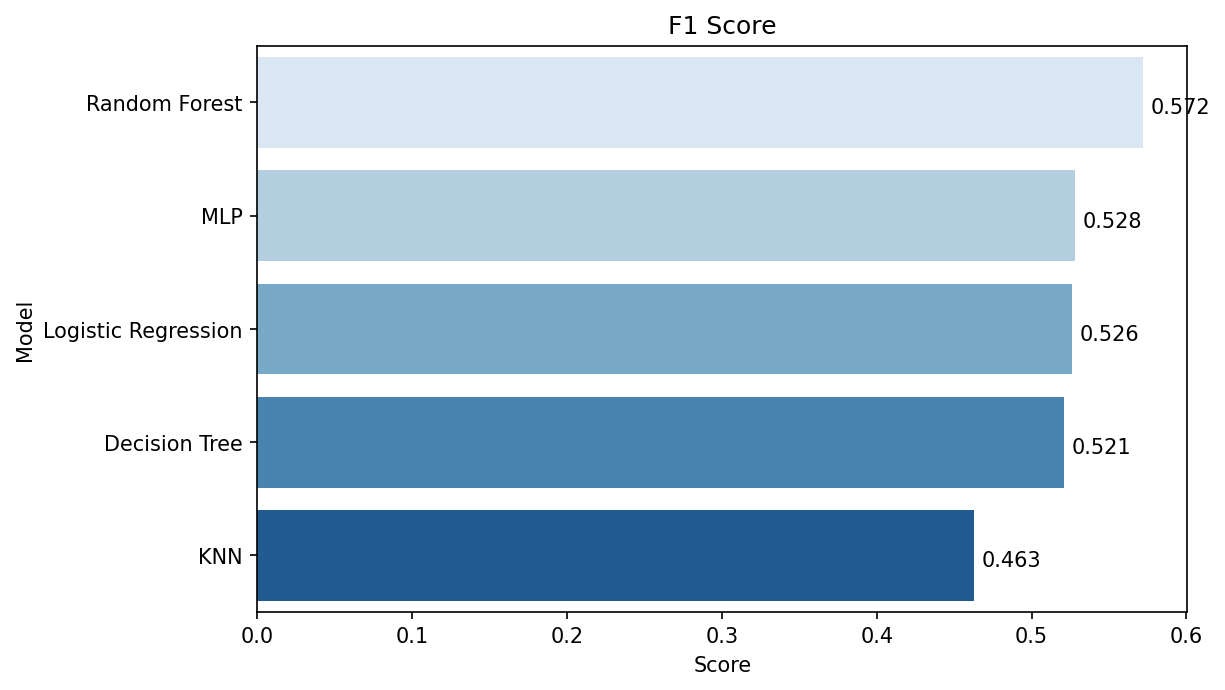

In [274]:
F1=comparision_table.sort_values(by='f1',ascending=False)[['Model','f1']].copy()

plt.figure(figsize=(8,5),dpi=150)
sns.barplot(y = F1['Model'], x = F1['f1'], palette = "Blues") ;
plt.title("F1 Score");
for i, v in enumerate(F1['f1']):
    plt.text(v + 0.005, i+0.1, str(v), color='black',fontsize=10)
plt.xlabel('Score');

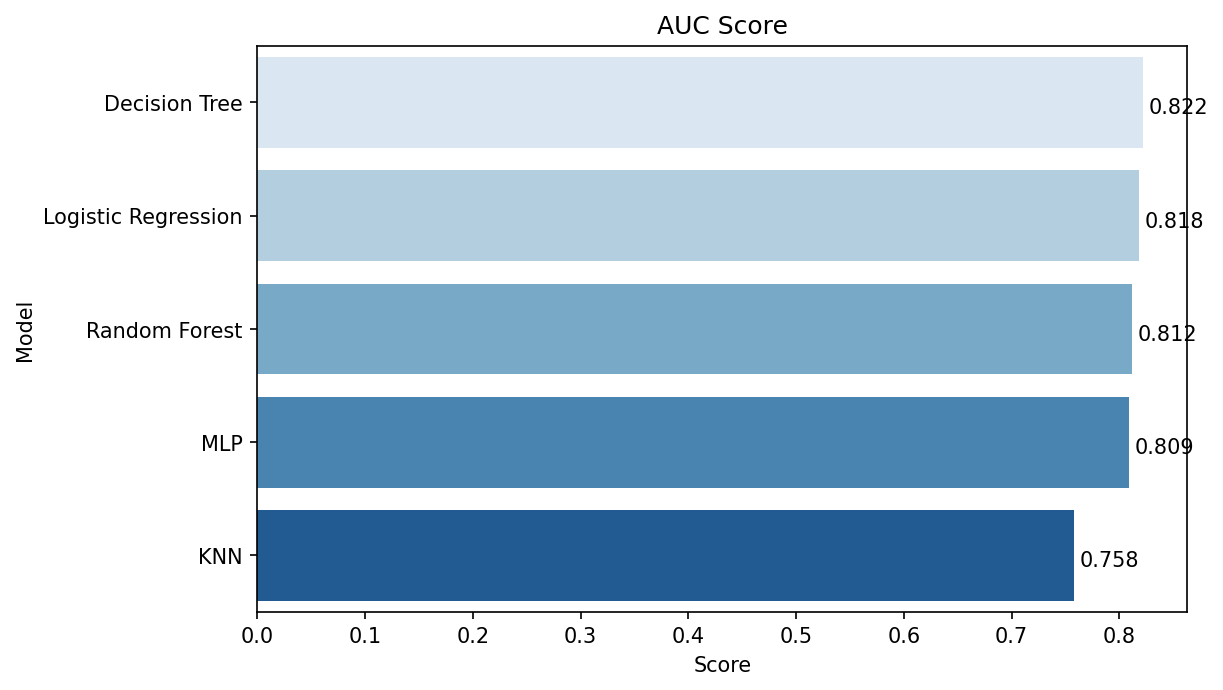

In [276]:
AUC=comparision_table.sort_values(by='AUC',ascending=False)[['Model','AUC']].copy()

plt.figure(figsize=(8,5),dpi=150)
sns.barplot(y = AUC['Model'], x = AUC['AUC'], palette = "Blues") ;
plt.title("AUC Score");
for i, v in enumerate(AUC['AUC']):
    plt.text(v + 0.005, i+0.1, str(v), color='black',fontsize=10)
plt.xlabel('Score');

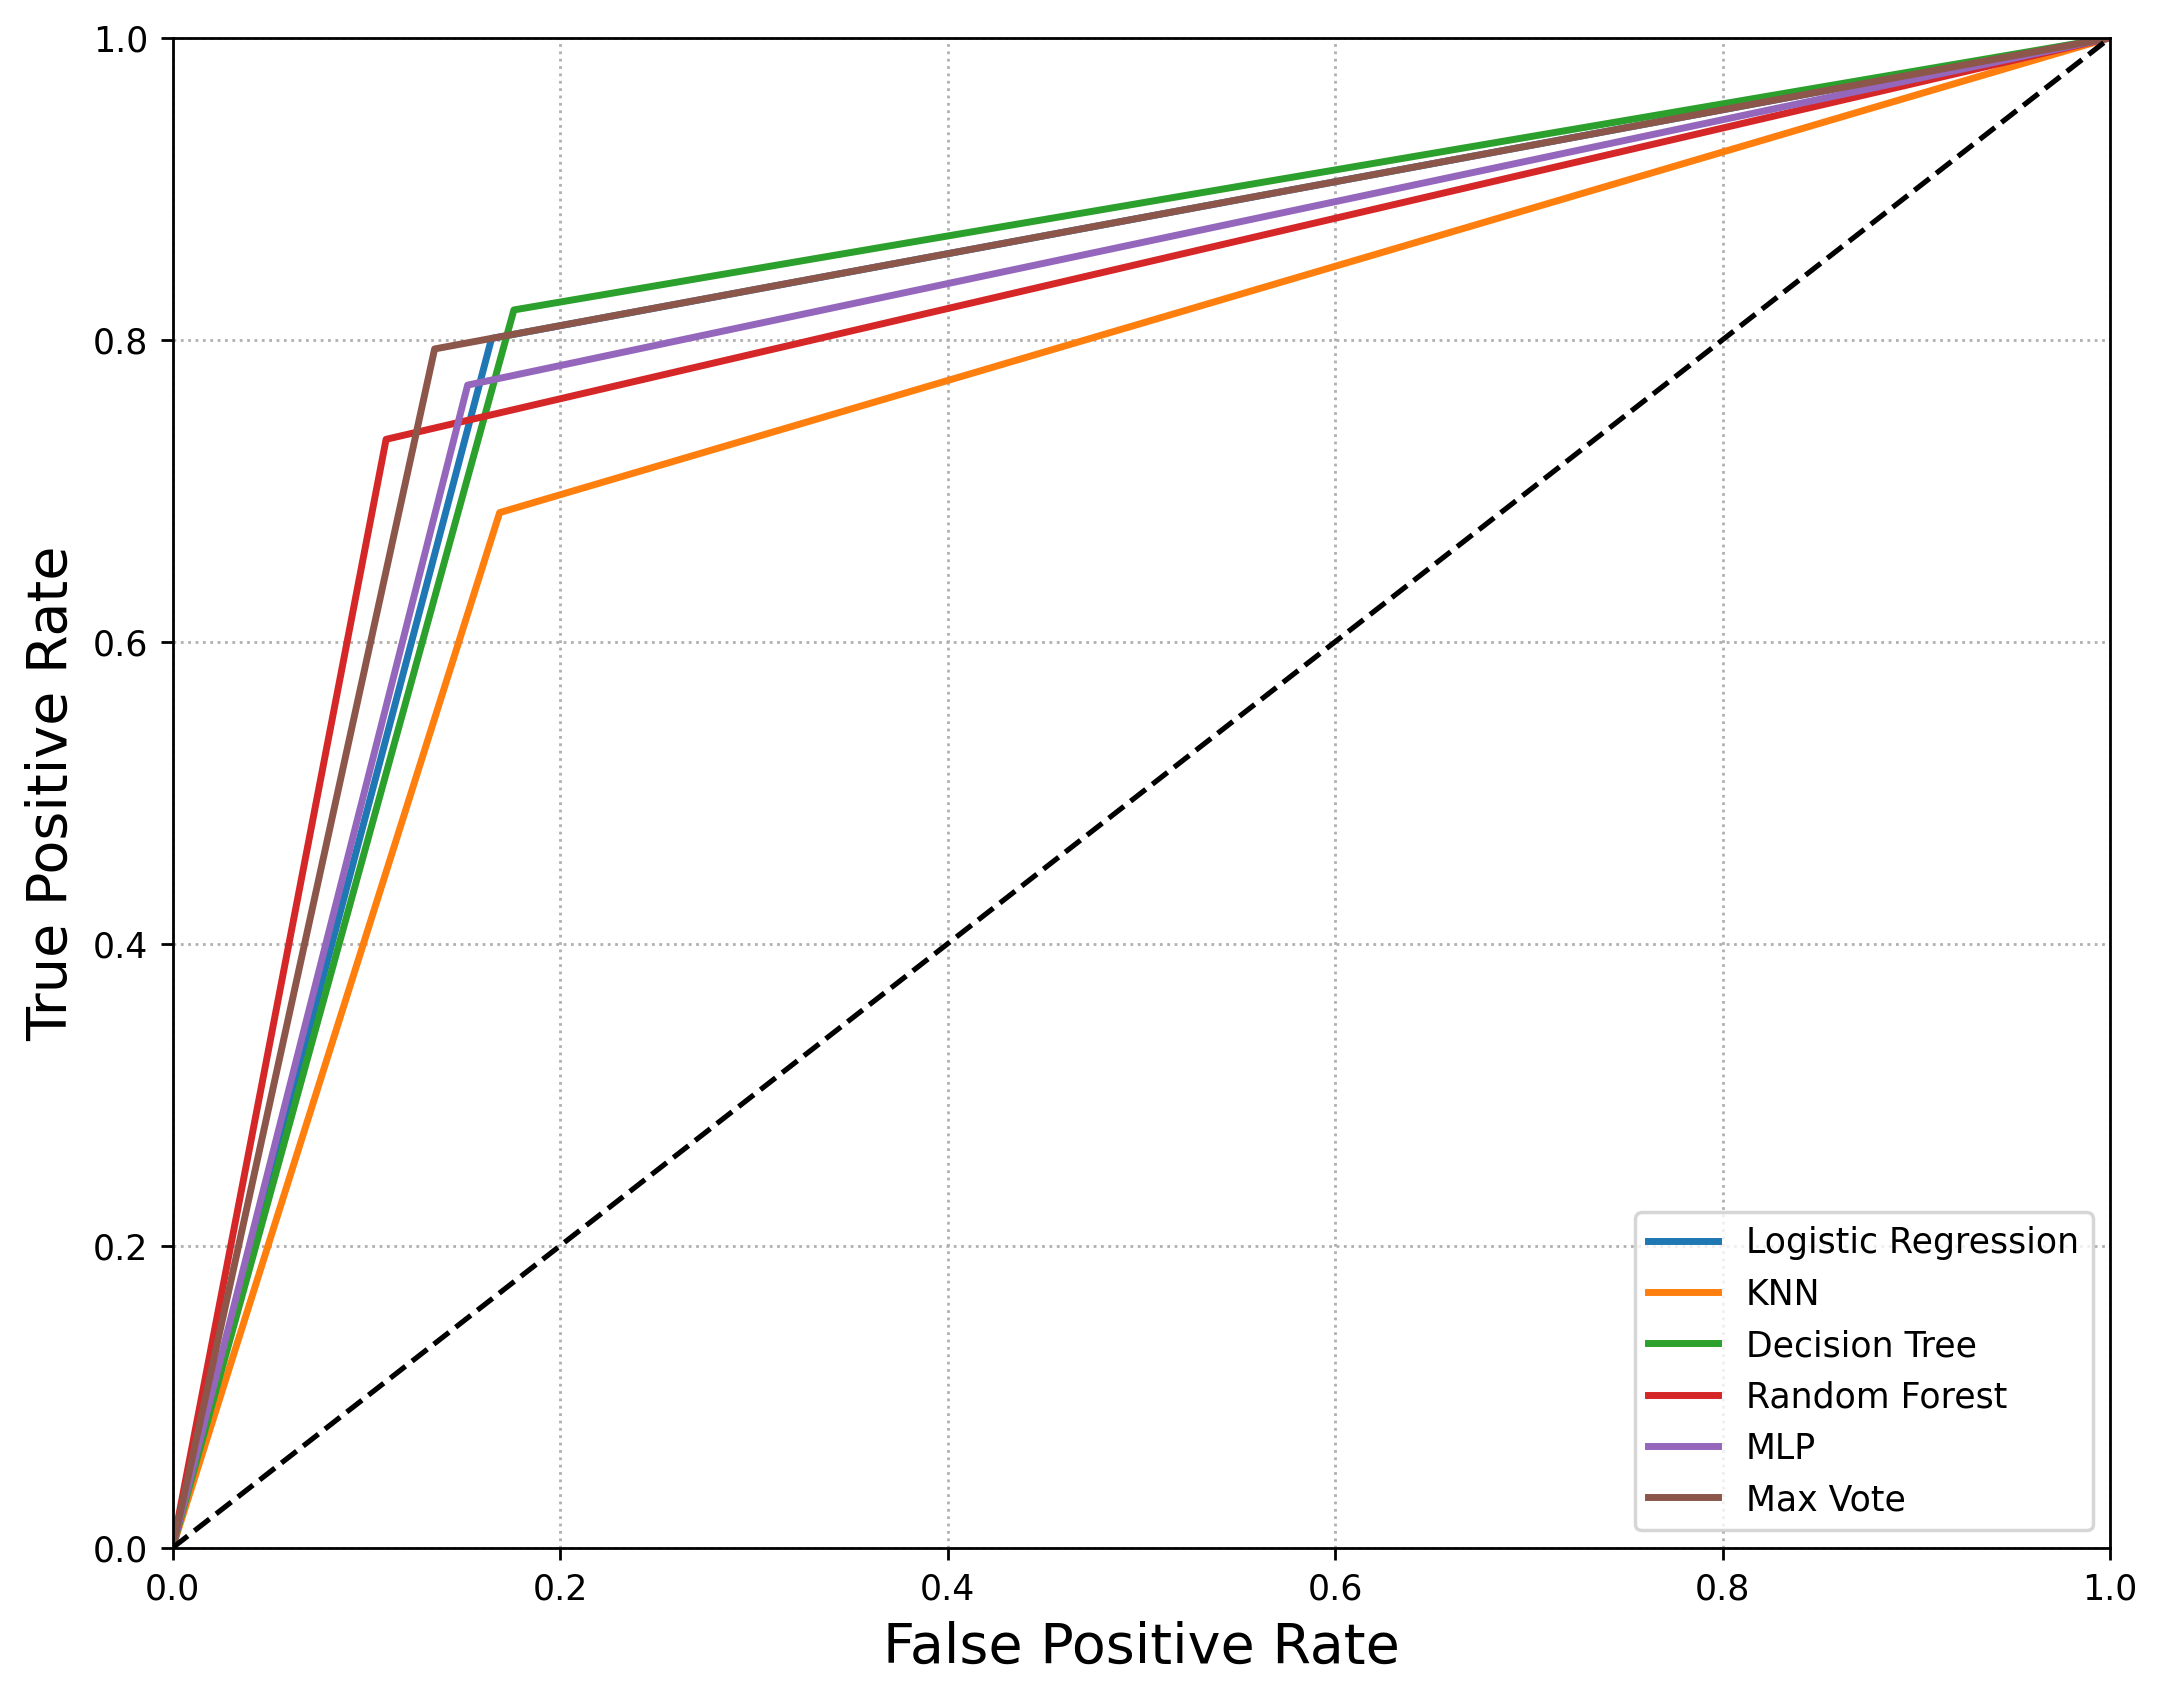

In [281]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_predict)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn_predict)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_predict)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_predict)
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, mlp_predict)
voting_fpr, voting_tpr, thresholds = roc_curve(y_test, voting_predict)

plt.figure(figsize=(10, 8),dpi=250)
plt.plot(lr_fpr, lr_tpr, linewidth=2, label="Logistic Regression")
plt.plot(knn_fpr, knn_tpr, linewidth=2, label="KNN")
plt.plot(dt_fpr, dt_tpr, linewidth=2, label="Decision Tree")
plt.plot(rf_fpr, rf_tpr, linewidth=2, label="Random Forest")
plt.plot(mlp_fpr, mlp_tpr, linewidth=2, label="MLP")
plt.plot(voting_fpr, voting_tpr, linewidth=2, label="Max Vote")

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.savefig('ROC curve.png')
plt.grid(linestyle=':');

# Feature Importance of DT model

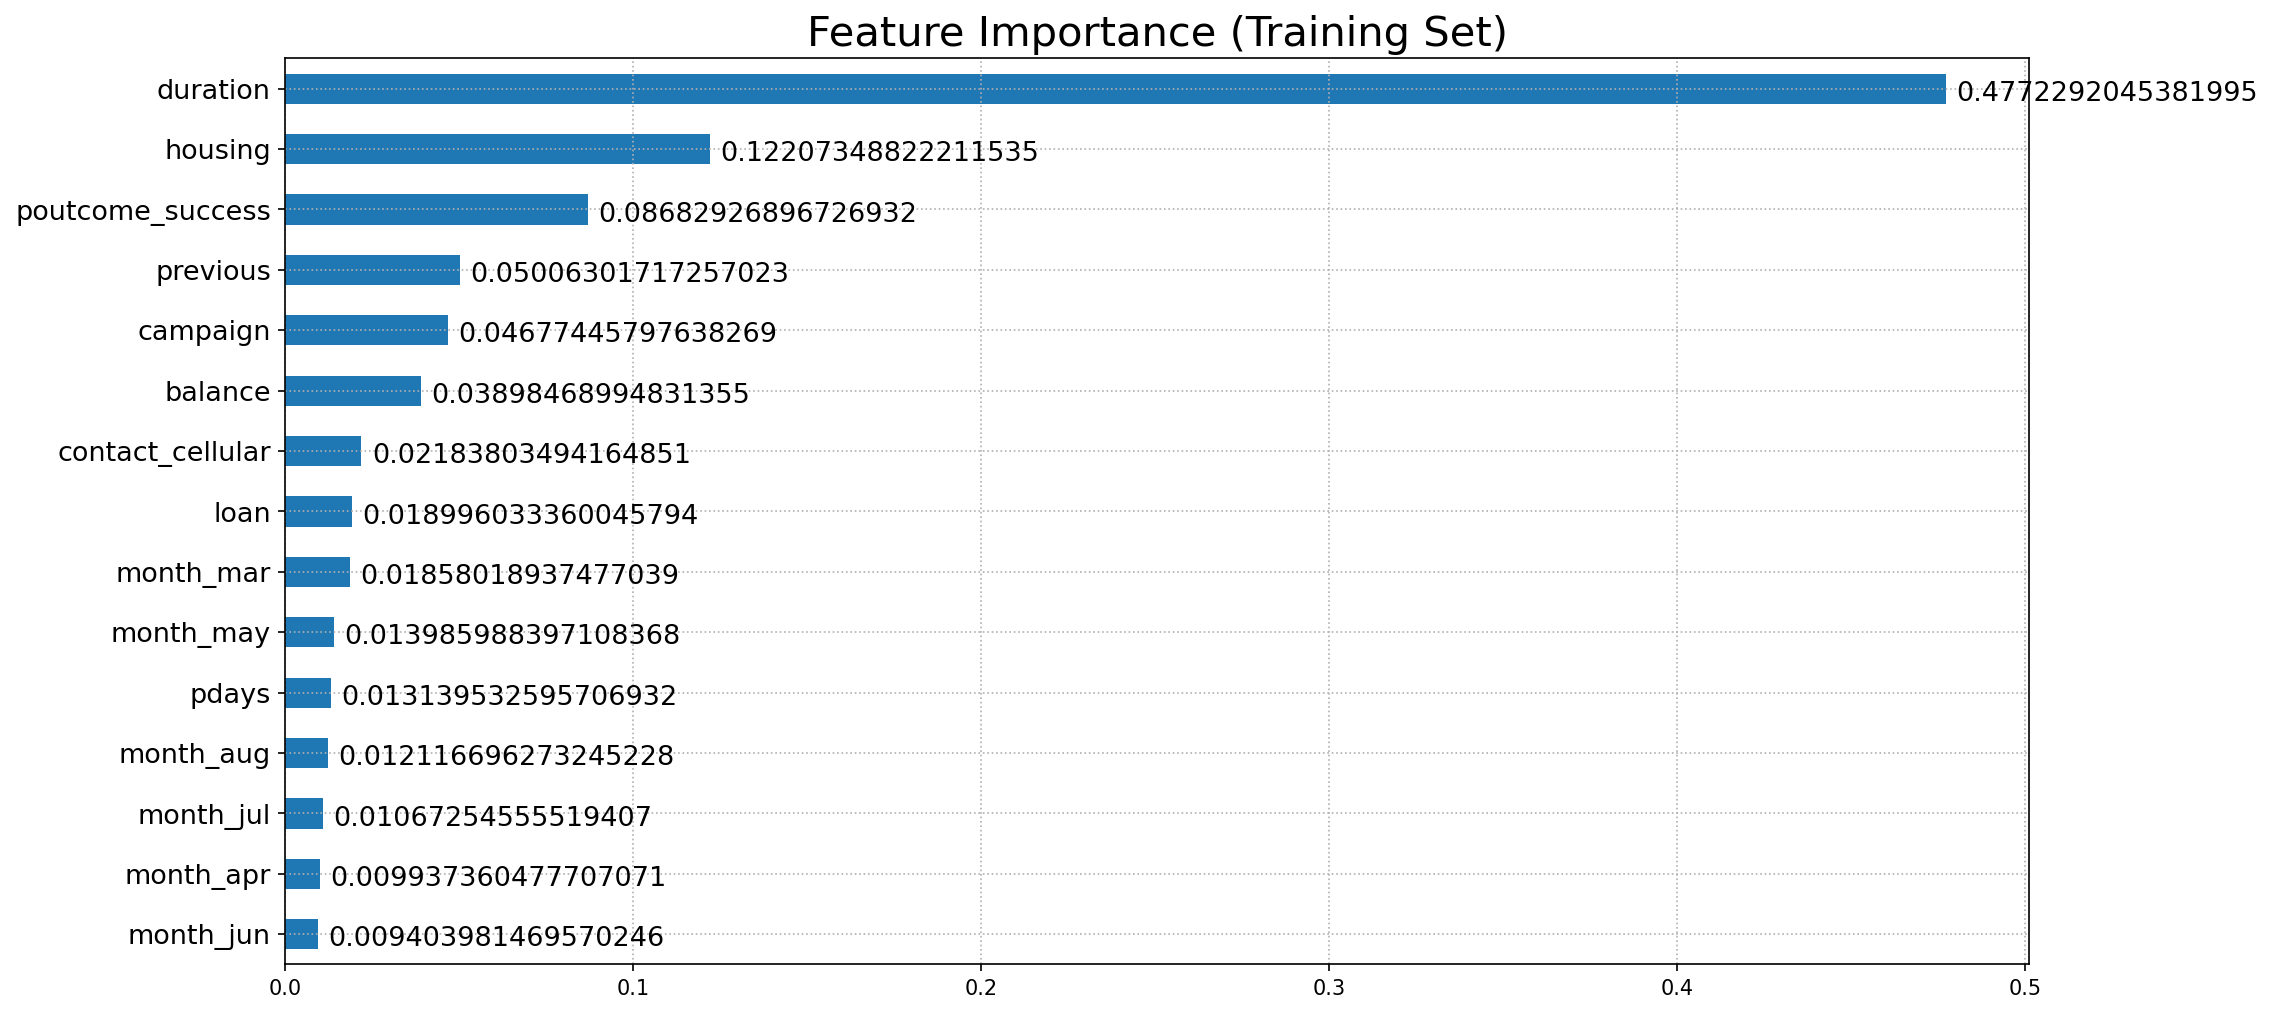

In [315]:
importance = list(dt_best.best_estimator_.feature_importances_)
variable = X_train.columns
top15_importance = sorted(importance,reverse=True)[0:15]

plt.figure(figsize=(15,8),dpi=150)
feature_importance =dt_best.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])
plt.barh(pos, feature_importance[sorted_idx], align='center',height=0.5)
plt.grid(linestyle=':')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx],fontsize=13)
for i, v in enumerate(top15_importance[::-1]):
    plt.text(v+0.003, i+22.8, str(v), color='black',fontsize=13)
plt.title('Feature Importance (Training Set)',fontsize=20);
plt.ylim(22.5,37.5);
plt.savefig('feature_importance.png');

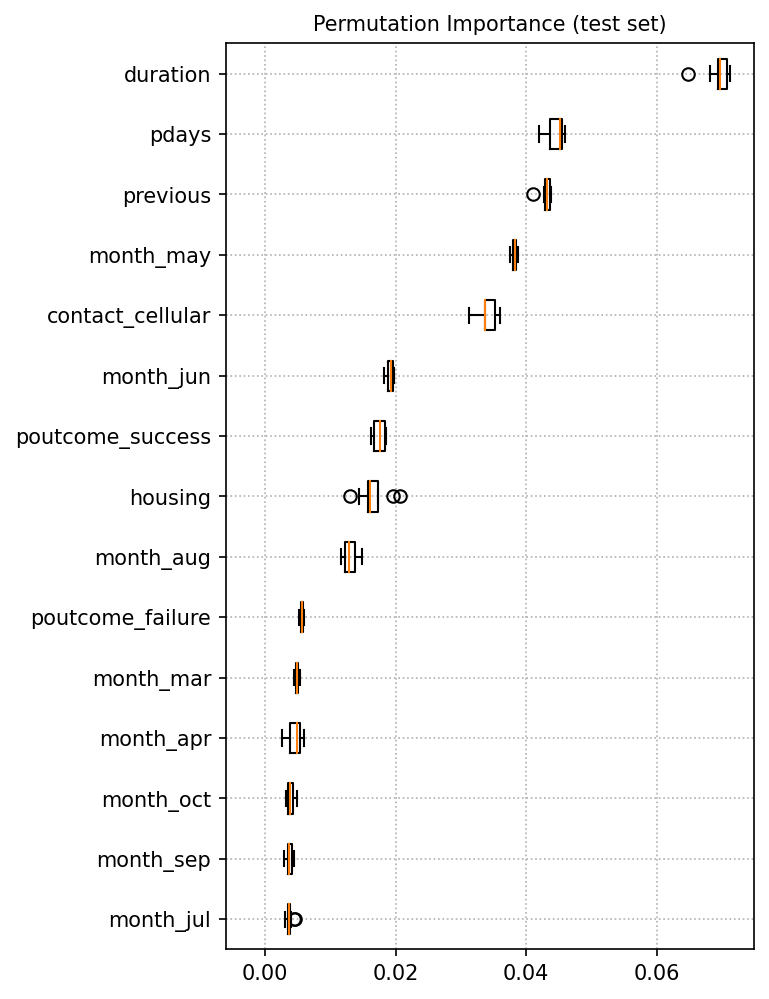

In [254]:
result = permutation_importance(dt_best.best_estimator_, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=4);
sorted_idx = result.importances_mean.argsort();
plt.figure(figsize=(10,8),dpi=150)
plt.subplot(1, 2, 2);
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train.columns)[sorted_idx])
plt.yticks(fontsize = 10)
plt.title("Permutation Importance (test set)",fontsize=15)
fig.tight_layout()
plt.grid(linestyle=':')
plt.ylim(23.5,38.5)
plt.savefig('permutation_importance.png')
plt.show();

# Voting Ensemble

In [140]:
lr_best.best_estimator_
dt_best.best_
rf_best.best_params_
mlp_best.best_params_

LogisticRegression(C=1, penalty='l1', solver='liblinear')

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 35,
 'min_samples_split': 2}

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (250,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [137]:
models=[('lr',LogisticRegression(solver='liblinear',C=1,penalty='l1',random_state=42)),
       ('dt',DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_leaf=35,min_samples_split=2,random_state=42)),
       ('rf',RandomForestClassifier(bootstrap=False,max_depth=50,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1000,random_state=42)),
       ('mlp',MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(250,),learning_rate='constant',solver='adam',random_state=42))]
voting_model=VotingClassifier(models,voting='soft').fit(X_train,y_train)
voting_predict=voting_model.predict(X_test)

/Users/Cecilia/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [138]:
Accuracy_score=[]
Recall_score= []
Precision_score=[]
F1_score=[]
auc_score=[]

predicted_value = [lr_predict,knn_predict,dt_predict,rf_predict,mlp_predict,voting_predict]

for classifiers in predicted_value:
    Accuracy_score.append(accuracy_score(y_test,classifiers).round(3))
    Recall_score.append(recall_score(y_test,classifiers).round(3))
    Precision_score.append(precision_score(y_test,classifiers).round(3))
    F1_score.append(f1_score(y_test,classifiers).round(3))
    auc_score.append(roc_auc_score(y_test,classifiers).round(3))

Scores={'Model':['Logistic Regression','KNN','Decision Tree','Random Forest','MLP','Voting'],
       'Accuracy':Accuracy_score,
       'Recall':Recall_score,
       'Precision':Precision_score,
       'f1':F1_score,
       'AUC':auc_score}
comparision_table=pd.DataFrame(Scores)

comparision_table

Model  Accuracy  Recall  Precision     f1    AUC
0  Logistic Regression     0.831   0.801      0.392  0.526  0.818
1                  KNN     0.814   0.686      0.350  0.463  0.758
2        Decision Tree     0.823   0.820      0.381  0.521  0.822
3        Random Forest     0.872   0.734      0.469  0.572  0.812
4                  MLP     0.839   0.770      0.401  0.528  0.809
5               Voting     0.856   0.794      0.438  0.564  0.829

In [136]:
Accuracy_score=[]
Recall_score= []
Precision_score=[]
F1_score=[]
auc_score=[]

predicted_value = [lr_predict,knn_predict,dt_predict,rf_predict,mlp_predict,voting_predict]

for classifiers in predicted_value:
    Accuracy_score.append(accuracy_score(y_test,classifiers).round(3))
    Recall_score.append(recall_score(y_test,classifiers).round(3))
    Precision_score.append(precision_score(y_test,classifiers).round(3))
    F1_score.append(f1_score(y_test,classifiers).round(3))
    auc_score.append(roc_auc_score(y_test,classifiers).round(3))

Scores={'Model':['Logistic Regression','KNN','Decision Tree','Random Forest','MLP','Voting'],
       'Accuracy':Accuracy_score,
       'Recall':Recall_score,
       'Precision':Precision_score,
       'f1':F1_score,
       'AUC':auc_score}
comparision_table=pd.DataFrame(Scores)

comparision_table

Model  Accuracy  Recall  Precision     f1    AUC
0  Logistic Regression     0.831   0.801      0.392  0.526  0.818
1                  KNN     0.814   0.686      0.350  0.463  0.758
2        Decision Tree     0.823   0.820      0.381  0.521  0.822
3        Random Forest     0.872   0.734      0.469  0.572  0.812
4                  MLP     0.839   0.770      0.401  0.528  0.809
5               Voting     0.869   0.742      0.463  0.570  0.814

# Decision Tree Visualisation

In [17]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree as sklearn_tree

from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees

import graphviz
import matplotlib.pyplot as plt

In [18]:
from sklearn import tree
from dtreeviz.trees import *
import graphviz
from sklearn.tree import export_graphviz 

In [20]:
dt_clf = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=35, random_state=42).fit(X_train,y_train)  #best estimator

In [55]:
%matplotlib inline
sk_dtree = ShadowSKDTree(dt_clf, X_train, y_train, list(X.columns), 'deposit')

In [22]:
%matplotlib inline
viz = dtreeviz(dt_clf, 
               x_data=X_train,
               y_data=y_train,
               target_name='deposit',
               feature_names=list(X_train.columns),
               class_names=['no','yes'], 
               title="Decision Tree - Training set")
viz.view()

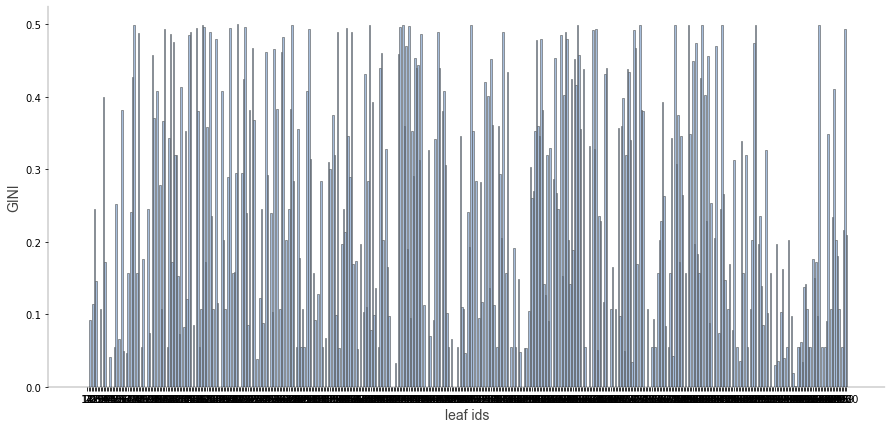

In [26]:
#Gini purity for each leaf
trees.viz_leaf_criterion(dt_clf, figsize=(15, 7))

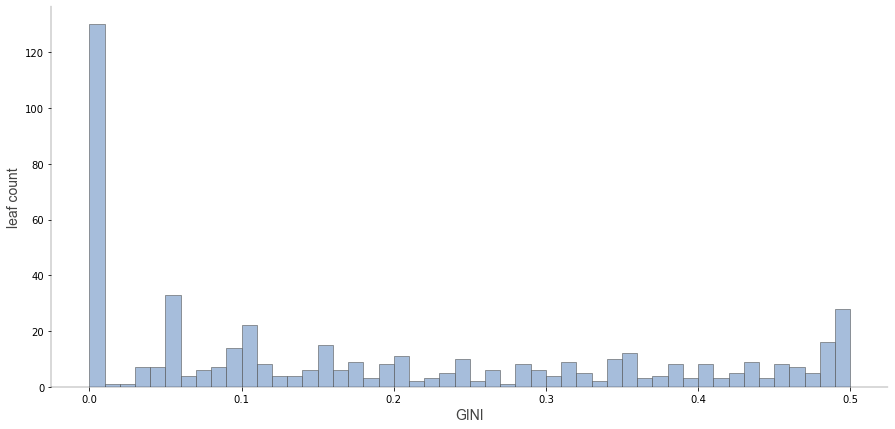

In [27]:
# leaves purities distribution
trees.viz_leaf_criterion(dt_clf, display_type="hist", bins=50, figsize=(15, 7))

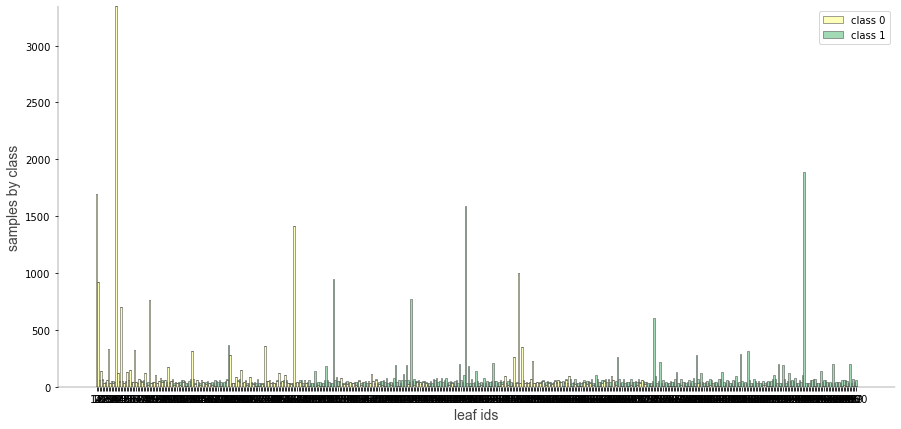

In [30]:
# number of samples for each leaf, grouped by target class values
trees.ctreeviz_leaf_samples(dt_clf, X_train,y_train, figsize=(15, 7))

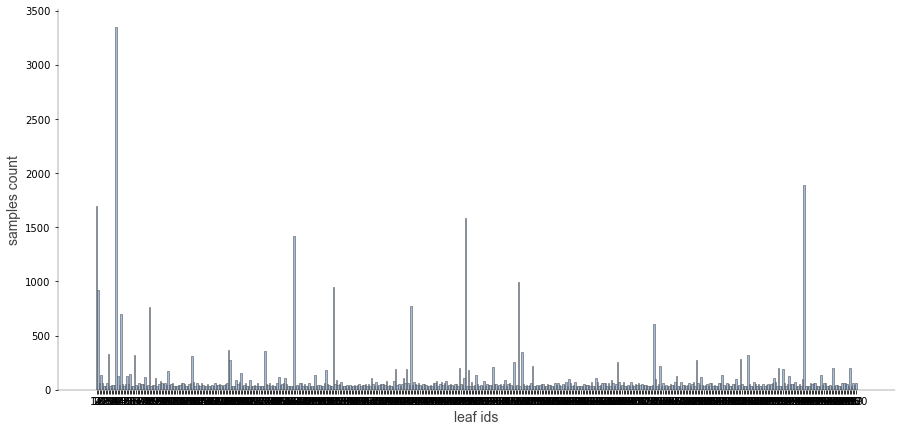

In [34]:
# leaves samples distribution
trees.viz_leaf_samples(dt_clf,X_train,y_train, figsize=(15, 7))

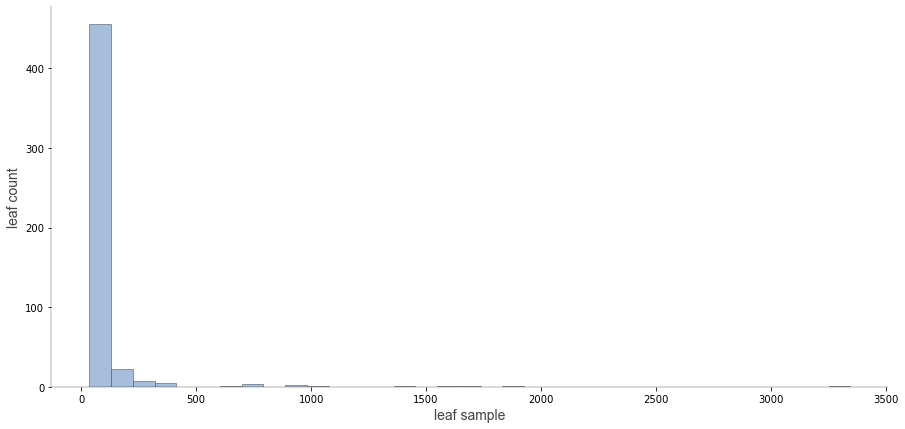

In [58]:
# leaves samples distribution
trees.viz_leaf_samples(dt_clf,X_train,y_train, display_type="hist", bins=35, figsize=(15, 7))

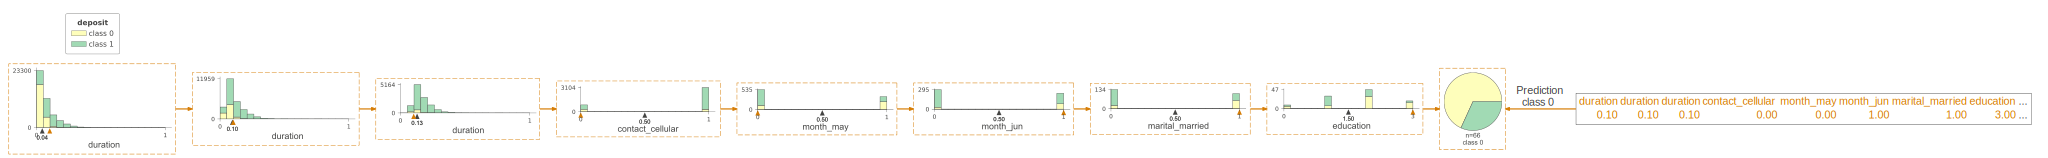

In [65]:
x = X_train.iloc[5]
trees.dtreeviz(sk_dtree, X=x,orientation ='LR',show_just_path=True)

In [59]:
print(trees.explain_prediction_path(sk_dtree, x, explanation_type="plain_english"))

duration < 0.02
0.5 <= month_mar 
poutcome_success < 0.5



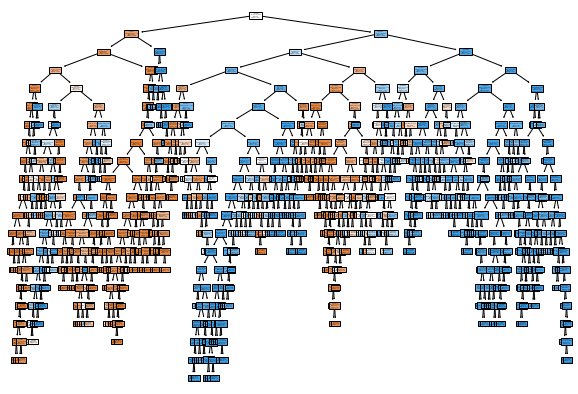

In [395]:
fig = plt.figure(figsize=(10,7))
dot_data = sklearn_tree.plot_tree(dt_best.best_estimator_, feature_names=list(X_train.columns),
                                  filled=True, node_ids=True)